In [1]:
import pandas as pd
import numpy as np


def read_data(filename):
    data = np.load(filename, allow_pickle=True)
    df = pd.DataFrame(data.tolist() if data.dtype == 'O' and isinstance(data[0], dict) else data)
    return df


def npy_preprocessor(filename):
    df = read_data(filename)
    return df['index'].values, df['inchi'].values, df['xyz'].values, df['chiral_centers'].values, df['rotation'].values


In [ ]:
import numpy as np

index_array, inchi_array, xyz_array, chiral_centers_array, rotation_array = npy_preprocessor('qm9_filtered.npy')
print(index_array.shape)
# print the first 5 rows of the index array
print(index_array[:5])
# print the first 5 rows of the inchi array
print(inchi_array[:5])
# print the first 5 rows of the xyz array
print(xyz_array[:5])
# print the first 5 rows of the chiral centers array
print(chiral_centers_array[:5])
# print the first 5 rows of the rotation array
print(rotation_array[:5])



['079782' '005049' '072010' '130188' '019995']
['InChI=1S/C6H7NO2/c8-4-1-5-3-6(9-5)2(4)7(1)3/h1-6,8H/t1-,2+,3-,4-,5+,6-'
 'InChI=1S/C4H4N4/c5-4-7-2-1-6-3-8-4/h1-3,5H'
 'InChI=1S/C8H10O/c1-8-3-4-2-5(8)7(9)6(4)8/h4-6H,2-3H2,1H3/t4-,5-,6+,8-/m1/s1'
 'InChI=1S/C4H4N4O/c5-3-2-4(8-7-3)6-1-9-2/h1H,(H3,5,7,8)'
 'InChI=1S/C6H8N2/c7-3-5-6(8-5)4-1-2-4/h4-6,8H,1-2H2/t5-,6+/m1/s1']
[array([[ 0.10321337,  1.43815203, -0.09291334,  0.        ,  0.        ,
          0.        ,  1.        ,  0.        ],
        [-0.01441036,  0.05632053,  0.02841368,  0.        ,  1.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.21133207, -0.67331038,  1.37509802,  0.        ,  1.        ,
          0.        ,  0.        ,  0.        ],
        [-0.75619358, -0.13873025,  2.48161378,  0.        ,  1.        ,
          0.        ,  0.        ,  0.        ],
        [-1.62801824,  0.90085126,  1.94983472,  0.        ,  0.        ,
          0.        ,  1.        ,  0.        ],
        [-2.3

/var/folders/mq/wny4bz610dgcnm6rrh8skcwc0000gn/T/ipykernel_15709/4143067113.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=atom_types, y=atom_counts, ax=axes[0, 0], palette="Set2")


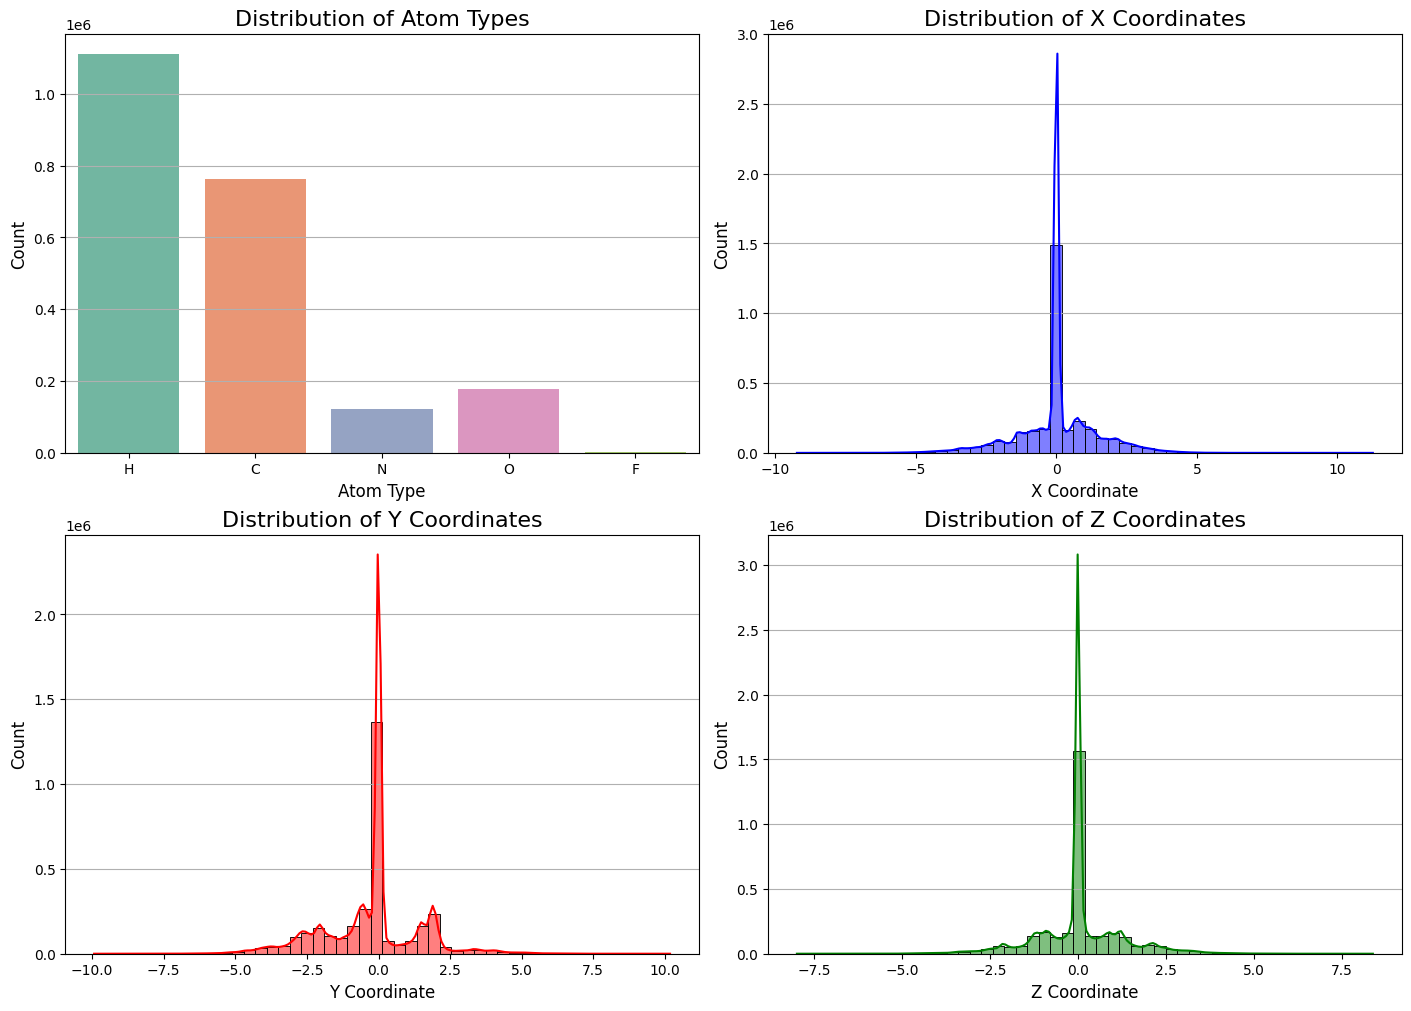

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# xyz array is a matrix 
'''
[array([[ 0.10321337,  1.43815203, -0.09291334,  0.        ,  0.        ,
          0.        ,  1.        ,  0.        ],
        [-0.01441036,  0.05632053,  0.02841368,  0.        ,  1.        ,
          0.        ,  0.        ,  0.        ],
          
'''

# where the 0-2 is the x,y,z and 3-7 is the one hot encoded atom type, H, C, N, O, F repsectively, show distribution of atom types

atom_types = ['H', 'C', 'N', 'O', 'F']

# Initialize counts for each atom type
atom_counts = np.zeros(len(atom_types))

# Traverse the xyz_array and sum the one-hot encoded columns
x_coords, y_coords, z_coords = [], [], []
for xyz_item in xyz_array:
    # Extract atom type one-hot encodings
    one_hot_encoded = xyz_item[:, 3:]
    atom_counts += one_hot_encoded.sum(axis=0)  # Sum along the rows and add to total counts
    
    # Extract x, y, z coordinates
    x_coords.extend(xyz_item[:, 0])
    y_coords.extend(xyz_item[:, 1])
    z_coords.extend(xyz_item[:, 2])

# Create subplots: 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)

# Plot 1: Distribution of atom types
sns.barplot(x=atom_types, y=atom_counts, ax=axes[0, 0], palette="Set2")
axes[0, 0].set_title("Distribution of Atom Types", fontsize=16)
axes[0, 0].set_xlabel("Atom Type", fontsize=12)
axes[0, 0].set_ylabel("Count", fontsize=12)
axes[0, 0].grid(axis='y')

# Plot 2: Distribution of X coordinates
sns.histplot(x_coords, bins=50, color='blue', kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of X Coordinates", fontsize=16)
axes[0, 1].set_xlabel("X Coordinate", fontsize=12)
axes[0, 1].set_ylabel("Count", fontsize=12)
axes[0, 1].grid(axis='y')

# Plot 3: Distribution of Y coordinates
sns.histplot(y_coords, bins=50, color='red', kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Y Coordinates", fontsize=16)
axes[1, 0].set_xlabel("Y Coordinate", fontsize=12)
axes[1, 0].set_ylabel("Count", fontsize=12)
axes[1, 0].grid(axis='y')

# Plot 4: Distribution of Z coordinates
sns.histplot(z_coords, bins=50, color='green', kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Z Coordinates", fontsize=16)
axes[1, 1].set_xlabel("Z Coordinate", fontsize=12)
axes[1, 1].set_ylabel("Count", fontsize=12)
axes[1, 1].grid(axis='y')

# Show the plot
plt.show()

Ratios of observed values for first elements (length 1):
3: 0.15
4: 0.25
6: 0.18
2: 0.06
5: 0.27
7: 0.07
1: 0.02
8: 0.01
0: 0.00

Ratios of observed values for second elements (length 1):
R: 0.49
S: 0.51
Tet_CW: 0.00
Tet_CCW: 0.00
Ratio of molecules with 0 chiral centers: 0.30
Ratio of molecules with 1 or more chiral centers: 0.70


/var/folders/mq/wny4bz610dgcnm6rrh8skcwc0000gn/T/ipykernel_48912/2958154226.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bin_labels, y=bin_counts, ax=axes[2, 1], palette="Set2")


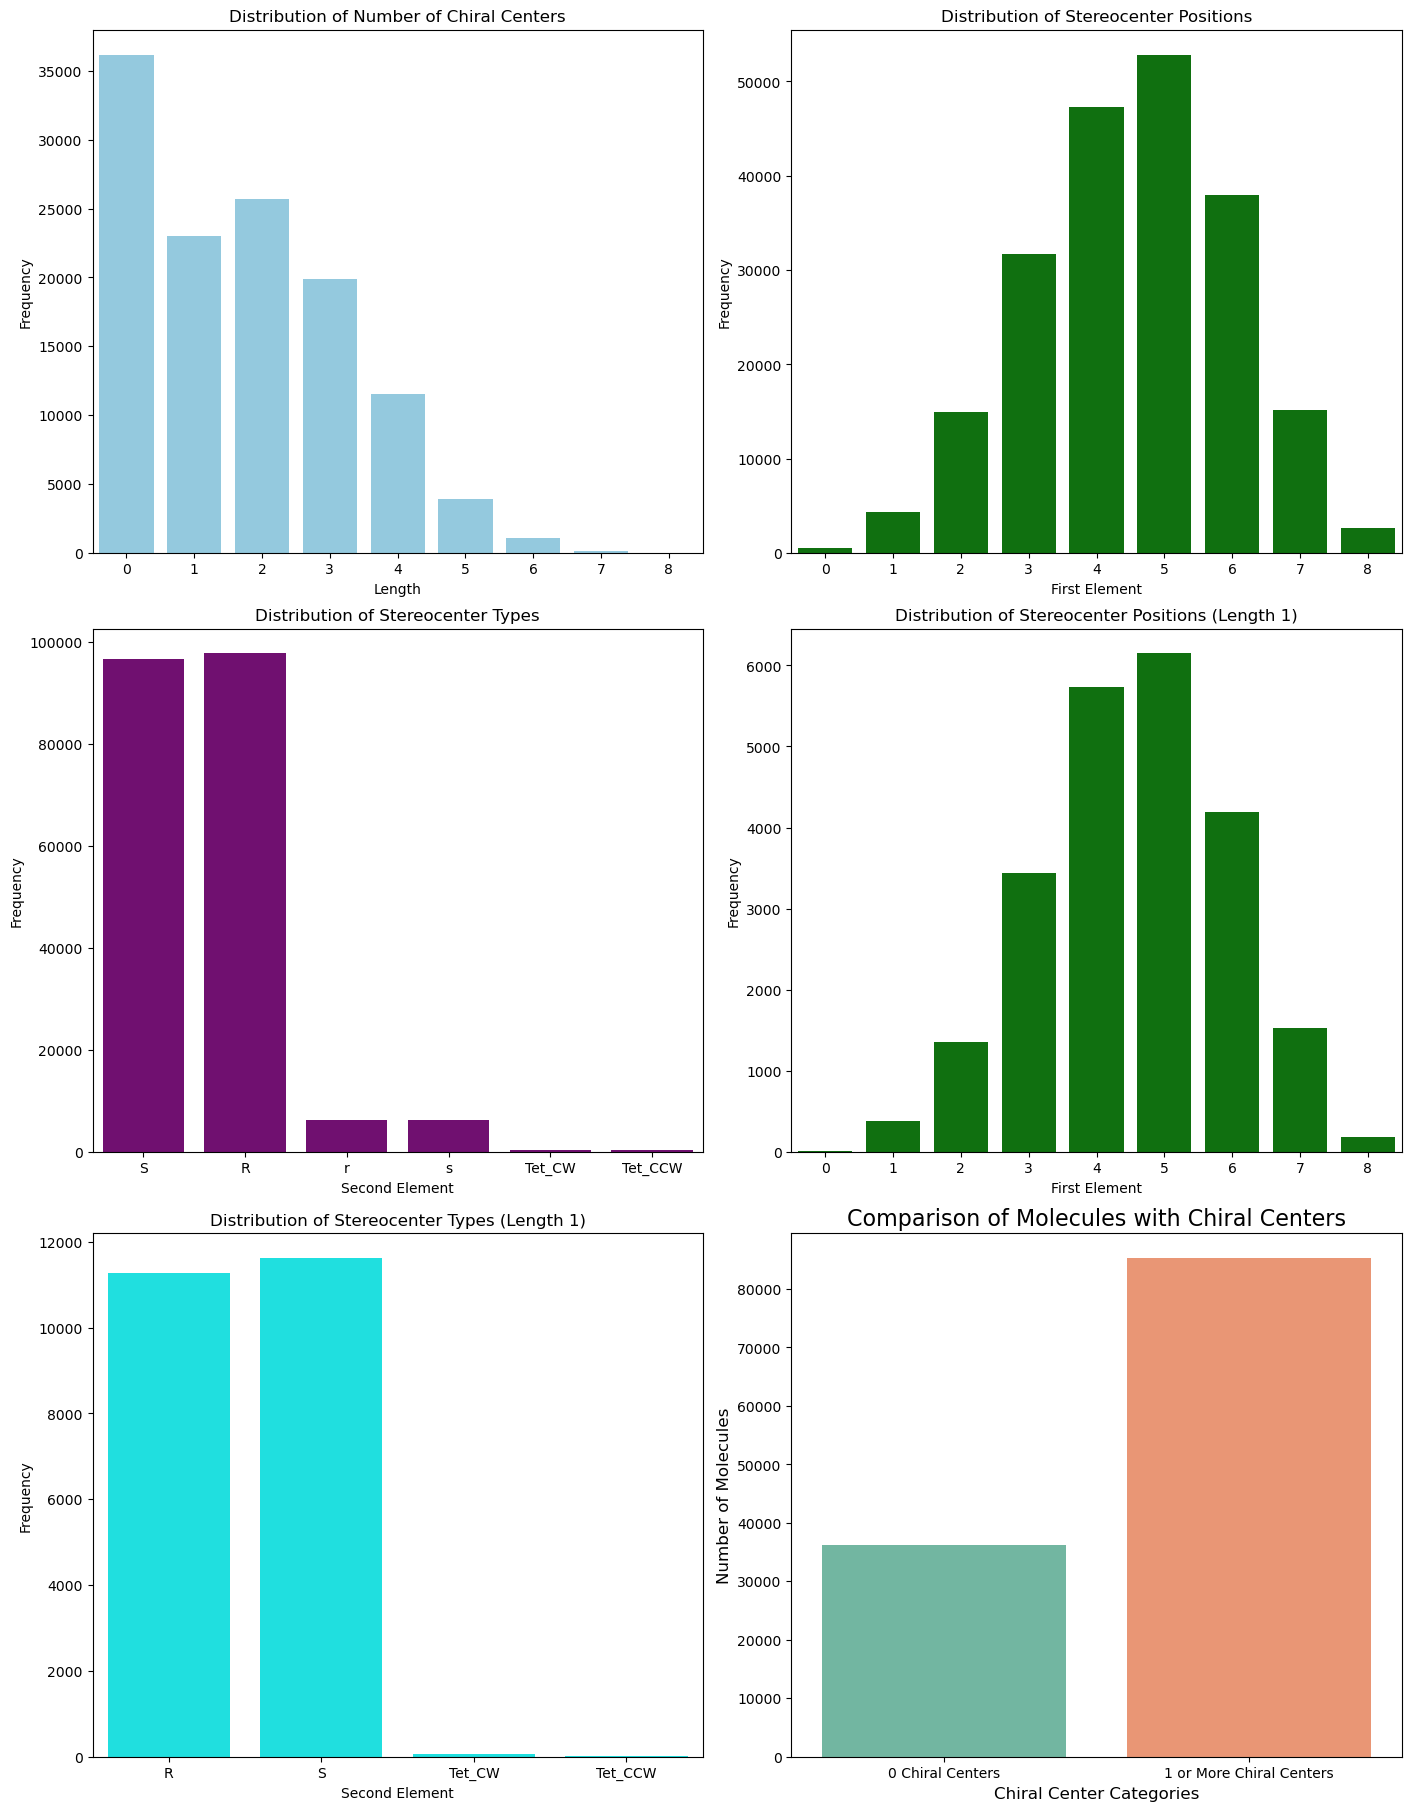

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter


# Distribution of the length of the lists
lengths = [len(chiral_centers) for chiral_centers in chiral_centers_array]

# Distribution of the first elements of the tuples
first_elements = [chiral[0] for chiral_centers in chiral_centers_array for chiral in chiral_centers]

# Distribution of the second elements of the tuples
second_elements = [chiral[1] for chiral_centers in chiral_centers_array for chiral in chiral_centers]

# Filter molecules with chiral length 1
chiral_centers_array_length_1 = [chiral_centers for chiral_centers in chiral_centers_array if len(chiral_centers) == 1]

# Distribution of the first elements of the tuples (length 1)
first_elements_length_1 = [chiral[0] for chiral_centers in chiral_centers_array_length_1 for chiral in chiral_centers]

# Distribution of the second elements of the tuples (length 1)
second_elements_length_1 = [chiral[1] for chiral_centers in chiral_centers_array_length_1 for chiral in chiral_centers]

# Count occurrences for bar plots
second_elements_count = Counter(second_elements)
second_elements_count_length_1 = Counter(second_elements_length_1)

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 18), constrained_layout=True)

# Plot 1: Length distribution
lengths_count = Counter(lengths)
sns.barplot(
    x=list(lengths_count.keys()),
    y=list(lengths_count.values()),
    ax=axes[0, 0],
    color="skyblue"
)
axes[0, 0].set_title("Distribution of Number of Chiral Centers")
axes[0, 0].set_xlabel("Length")
axes[0, 0].set_ylabel("Frequency")

# Plot 2: Distribution of first elements
first_elements = Counter(first_elements)
sns.barplot(
    x=list(first_elements.keys()),
    y=list(first_elements.values()),
    ax=axes[0, 1],
    color="green"
)
axes[0, 1].set_title("Distribution of Stereocenter Positions")
axes[0, 1].set_xlabel("First Element")
axes[0, 1].set_ylabel("Frequency")

# Plot 3: Distribution of second elements
sns.barplot(x=list(second_elements_count.keys()), y=list(second_elements_count.values()), ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Distribution of Stereocenter Types")
axes[1, 0].set_xlabel("Second Element")
axes[1, 0].set_ylabel("Frequency")

# Count occurrences of each first element for length 1
first_elements_count_length_1 = Counter(first_elements_length_1)

# Plot as a bar plot
sns.barplot(
    x=list(first_elements_count_length_1.keys()),
    y=list(first_elements_count_length_1.values()),
    ax=axes[1, 1],
    color="green"
)
axes[1, 1].set_title("Distribution of Stereocenter Positions (Length 1)")
axes[1, 1].set_xlabel("First Element")
axes[1, 1].set_ylabel("Frequency")

# Plot 5: Distribution of second elements (length 1)
sns.barplot(x=list(second_elements_count_length_1.keys()), y=list(second_elements_count_length_1.values()), ax=axes[2, 0], color="cyan")
axes[2, 0].set_title("Distribution of Stereocenter Types (Length 1)")
axes[2, 0].set_xlabel("Second Element")
axes[2, 0].set_ylabel("Frequency")

# Print ratios of observed values
total_first_elements_length_1 = sum(first_elements_count_length_1.values())
total_second_elements_length_1 = sum(second_elements_count_length_1.values())

print("Ratios of observed values for first elements (length 1):")
for element, count in first_elements_count_length_1.items():
    print(f"{element}: {count / total_first_elements_length_1:.2f}")

print("\nRatios of observed values for second elements (length 1):")
for element, count in second_elements_count_length_1.items():
    print(f"{element}: {count / total_second_elements_length_1:.2f}")

# Classify molecules into two bins: 0 chiral centers and 1 or more chiral centers
not_chiral = []
chiral = []
for chiral_centers in chiral_centers_array:
    if len(chiral_centers) == 0:
        not_chiral.append(0)  # No chiral centers
    else:
        chiral.append(len(chiral_centers))  # 1 or more chiral centers

# Create a list for barplot: [0 for not chiral, 1 for chiral]
bin_labels = ['0 Chiral Centers', '1 or More Chiral Centers']
bin_counts = [len(not_chiral), len(chiral)]

# Create the bar plot
sns.barplot(x=bin_labels, y=bin_counts, ax=axes[2, 1], palette="Set2")

# Add titles and labels
axes[2, 1].set_title("Comparison of Molecules with Chiral Centers", fontsize=16)
axes[2, 1].set_xlabel("Chiral Center Categories", fontsize=12)
axes[2, 1].set_ylabel("Number of Molecules", fontsize=12)

# Print ratios
total_molecules = len(chiral_centers_array)
ratio_not_chiral = len(not_chiral) / total_molecules
ratio_chiral = len(chiral) / total_molecules

print(f"Ratio of molecules with 0 chiral centers: {ratio_not_chiral:.2f}")
print(f"Ratio of molecules with 1 or more chiral centers: {ratio_chiral:.2f}")

# Show the plot
plt.show()




/var/folders/mq/wny4bz610dgcnm6rrh8skcwc0000gn/T/ipykernel_15709/2078025783.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(first_elements_count.keys()), y=list(first_elements_count.values()), palette="viridis")


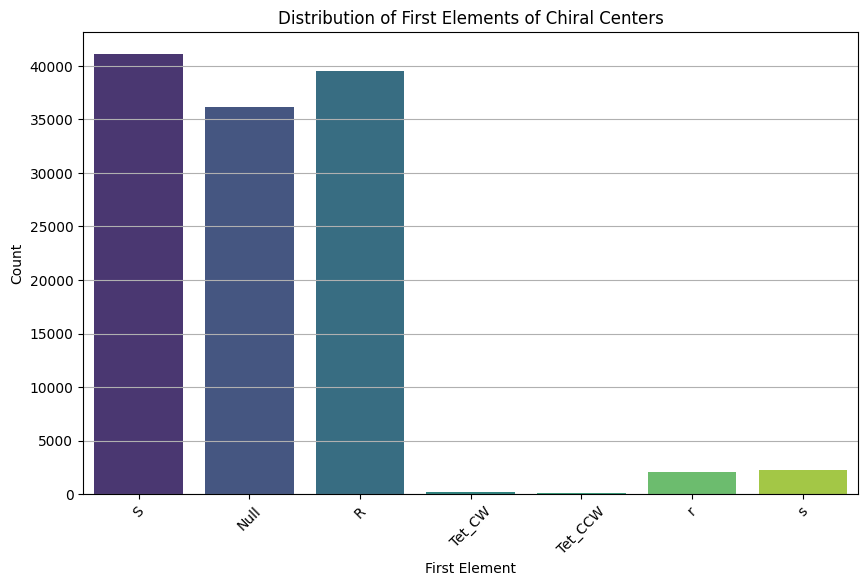

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# out of all molecules, find the distribution of the chiral_centers_array[0], show all unique, if it is empty tuple, plug in 'Null'
first_elements = [chiral_centers[0][1] if chiral_centers else 'Null' for chiral_centers in chiral_centers_array]

# Count occurrences for bar plots
first_elements_count = Counter(first_elements)

# Plot the distribution of the first elements
plt.figure(figsize=(10, 6))
sns.barplot(x=list(first_elements_count.keys()), y=list(first_elements_count.values()), palette="viridis")
plt.title("Distribution of First Elements of Chiral Centers")
plt.xlabel("First Element")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



rotation_0
mean: -7.43149724912697
min: -472563.62
max: 35526.67
std: 1381.7366612133098
rotation_1
mean: -4.381265319233051
min: -55508.79
max: 46566.31
std: 371.27129027417413
rotation_2
mean: -60.00988271726958
min: -6073174.31
max: 3446944.43
std: 23235.92987383118
For Chiral Length 0 and Rotation_0: 16179 1298 18698


/var/folders/mq/wny4bz610dgcnm6rrh8skcwc0000gn/T/ipykernel_15709/226287081.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Below Zero', 'Zero', 'Above Zero'], y=[below_zero, zero, above_zero], palette="viridis")


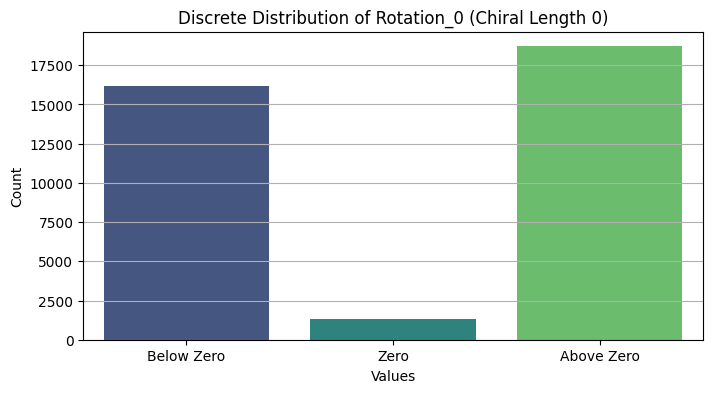

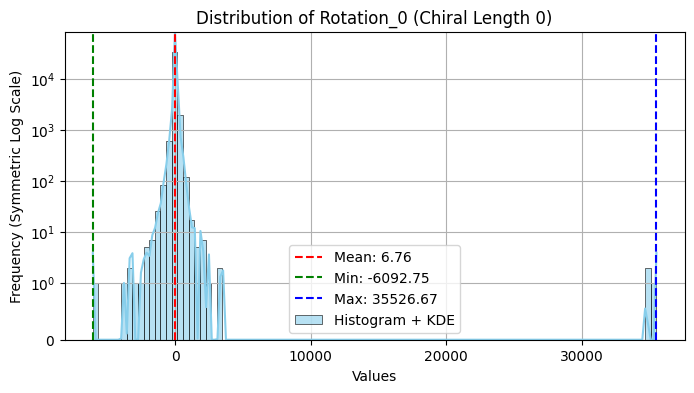

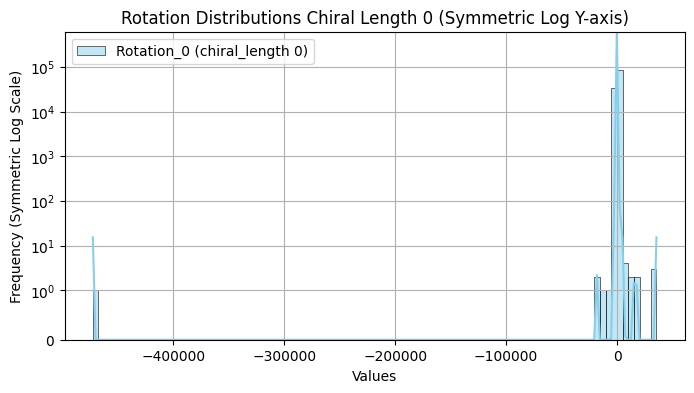

For Chiral Length 1 and Rotation_0: 11888 55 11030


/var/folders/mq/wny4bz610dgcnm6rrh8skcwc0000gn/T/ipykernel_15709/226287081.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Below Zero', 'Zero', 'Above Zero'], y=[below_zero, zero, above_zero], palette="viridis")


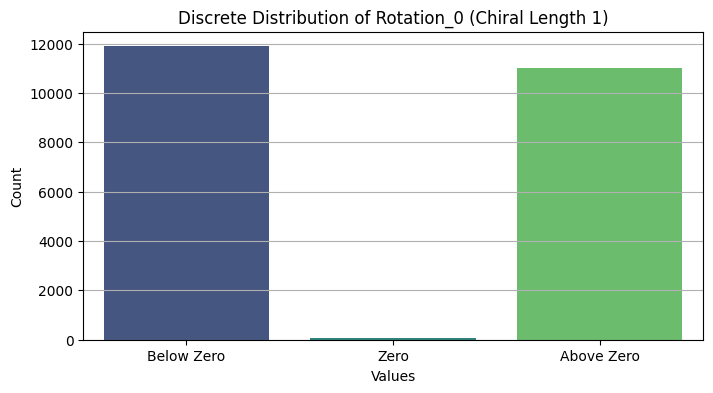

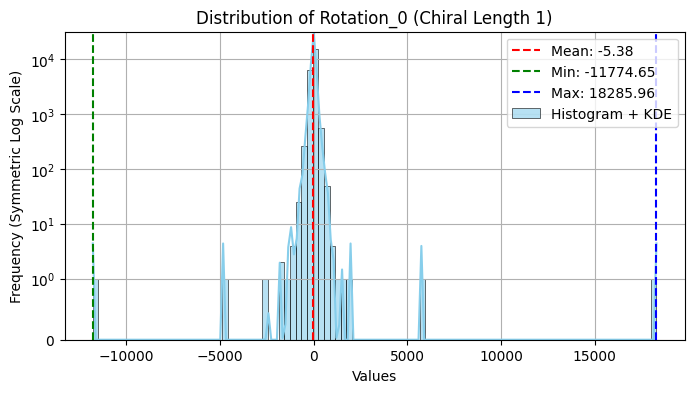

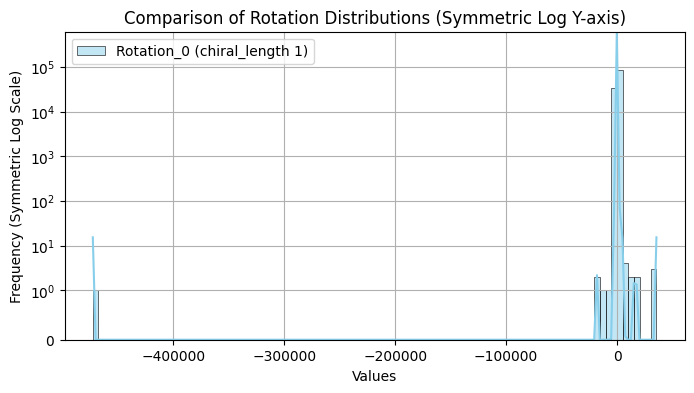

For Rotation_0: 60004 2657 58755


/var/folders/mq/wny4bz610dgcnm6rrh8skcwc0000gn/T/ipykernel_15709/226287081.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Below Zero', 'Zero', 'Above Zero'], y=[below_zero, zero, above_zero], palette="viridis")


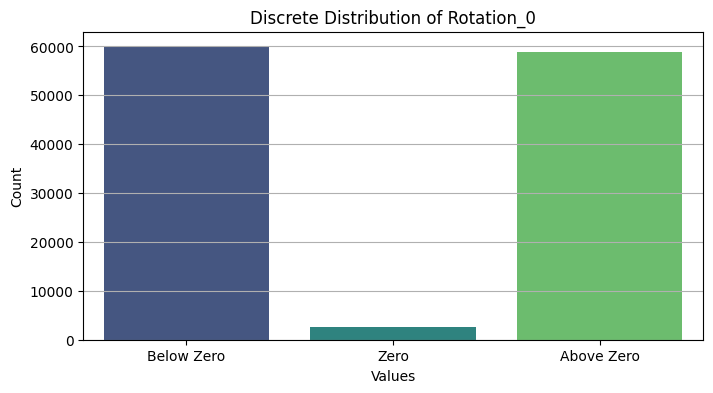

/var/folders/mq/wny4bz610dgcnm6rrh8skcwc0000gn/T/ipykernel_15709/226287081.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Below Zero', 'Zero', 'Above Zero'], y=[below_zero, zero, above_zero], palette="viridis")


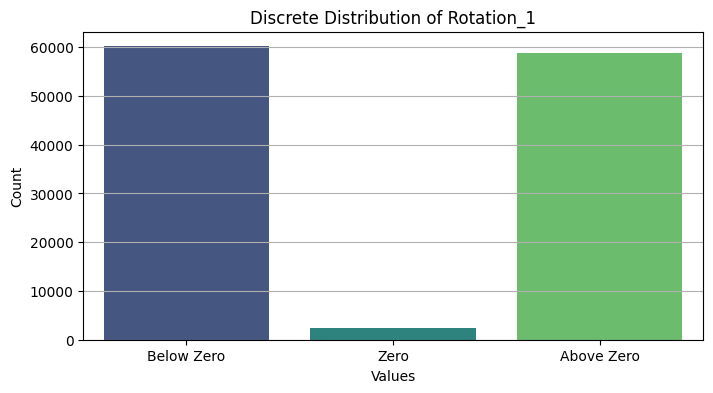

/var/folders/mq/wny4bz610dgcnm6rrh8skcwc0000gn/T/ipykernel_15709/226287081.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Below Zero', 'Zero', 'Above Zero'], y=[below_zero, zero, above_zero], palette="viridis")


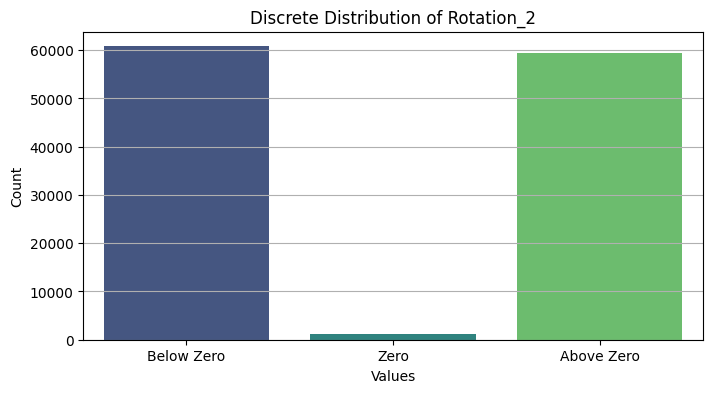

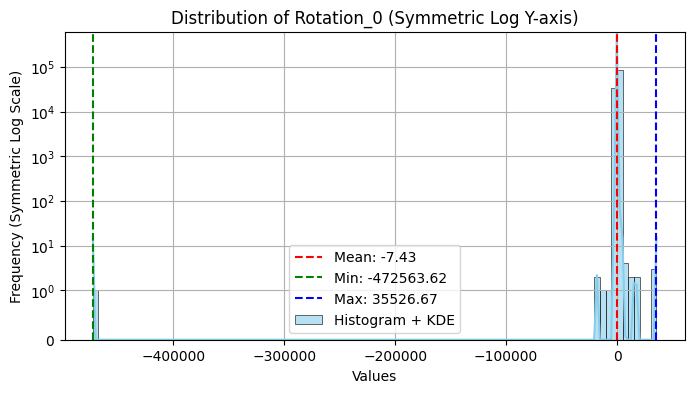

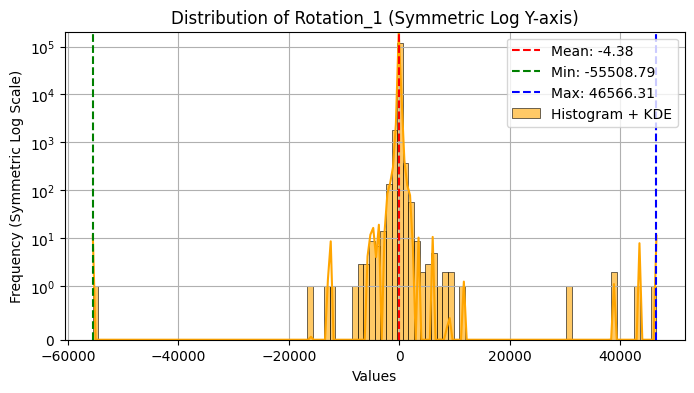

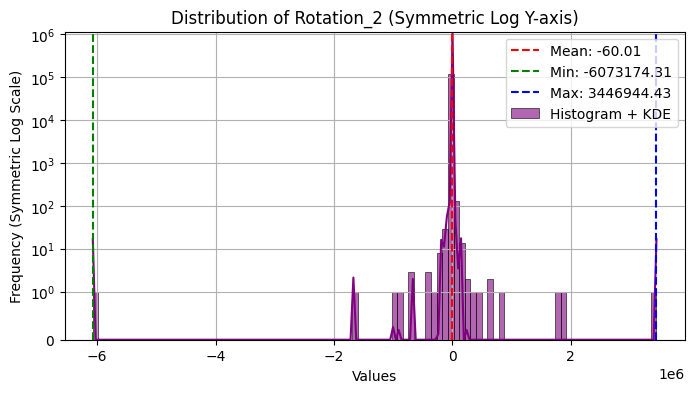

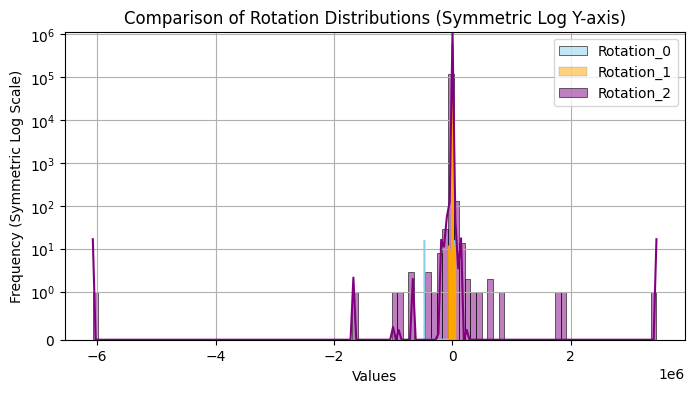

In [12]:
# rotation array is  a 3 value tuple array, for each tuple index, print the distribution of the values
rotation_0 = [rotation[0] for rotation in rotation_array]
rotation_1 = [rotation[1] for rotation in rotation_array]
rotation_2 = [rotation[2] for rotation in rotation_array]

# print summary of rotation_0
print('rotation_0')
print('mean:', np.mean(rotation_0))
print('min:', np.min(rotation_0))
print('max:', np.max(rotation_0))
print('std:', np.std(rotation_0))

# print summary of rotation_1
print('rotation_1')
print('mean:', np.mean(rotation_1))
print('min:', np.min(rotation_1))
print('max:', np.max(rotation_1))
print('std:', np.std(rotation_1))

# print summary of rotation_2
print('rotation_2')
print('mean:', np.mean(rotation_2))
print('min:', np.min(rotation_2))
print('max:', np.max(rotation_2))
print('std:', np.std(rotation_2))

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# function to count below_zero, zero, above_zero
def count_values(rotation_array):
    below_zero, zero, above_zero = 0, 0, 0
    for rotation in rotation_array:
        if rotation < 0:
            below_zero += 1
        elif rotation == 0:
            zero += 1
        else:
            above_zero += 1
    return below_zero, zero, above_zero
# Helper function to plot distribution with symlog y-axis
def plot_distribution_with_symlog(data, title, color, xlabel="Values", ylabel="Frequency"):
    plt.figure(figsize=(8, 4))
    sns.histplot(data, bins=100, kde=True, color=color, alpha=0.6, label="Histogram + KDE")
    plt.axvline(np.mean(data), color='red', linestyle='--', label=f'Mean: {np.mean(data):.2f}')
    plt.axvline(np.min(data), color='green', linestyle='--', label=f'Min: {np.min(data):.2f}')
    plt.axvline(np.max(data), color='blue', linestyle='--', label=f'Max: {np.max(data):.2f}')
    plt.yscale('symlog', linthresh=1)  # Apply symmetric log scale to the y-axis
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel + " (Symmetric Log Scale)")
    plt.legend()
    plt.grid(True)
    plt.show()


#create barchart for rotation_0 and chiral_length == 0
chiral_length_0_and_rotation_0 = [rotation_0[i] for i in range(len(rotation_0)) if len(chiral_centers_array[i]) == 0]
below_zero, zero, above_zero = count_values(chiral_length_0_and_rotation_0)
print("For Chiral Length 0 and Rotation_0:", below_zero, zero, above_zero)
plt.figure(figsize=(8, 4))
sns.barplot(x=['Below Zero', 'Zero', 'Above Zero'], y=[below_zero, zero, above_zero], palette="viridis")
plt.title("Discrete Distribution of Rotation_0 (Chiral Length 0)")
plt.xlabel("Values")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

#create histogram for rotation_0 and chiral_length == 0
plot_distribution_with_symlog(chiral_length_0_and_rotation_0, "Distribution of Rotation_0 (Chiral Length 0)", color="skyblue")
plt.figure(figsize=(8, 4))
sns.histplot(rotation_0, bins=100, kde=True, color="skyblue", alpha=0.5, label="Rotation_0 (chiral_length 0)")
plt.yscale('symlog', linthresh=1)  # Apply symmetric log scale to the y-axis
plt.title("Rotation Distributions Chiral Length 0 (Symmetric Log Y-axis)")
plt.xlabel("Values")
plt.ylabel("Frequency (Symmetric Log Scale)")
plt.legend()
plt.grid(True)
plt.show()



#create barchart for rotation_0 and chiral_length == 1
chiral_length_1_and_rotation_0 = [rotation_0[i] for i in range(len(rotation_0)) if len(chiral_centers_array[i]) == 1]
below_zero, zero, above_zero = count_values(chiral_length_1_and_rotation_0)
print("For Chiral Length 1 and Rotation_0:", below_zero, zero, above_zero)
plt.figure(figsize=(8, 4))
sns.barplot(x=['Below Zero', 'Zero', 'Above Zero'], y=[below_zero, zero, above_zero], palette="viridis")
plt.title("Discrete Distribution of Rotation_0 (Chiral Length 1)")
plt.xlabel("Values")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

#create histogram for rotation_0 and chiral_length == 1
plot_distribution_with_symlog(chiral_length_1_and_rotation_0, "Distribution of Rotation_0 (Chiral Length 1)", color="skyblue")
plt.figure(figsize=(8, 4))
sns.histplot(rotation_0, bins=100, kde=True, color="skyblue", alpha=0.5, label="Rotation_0 (chiral_length 1)")
plt.yscale('symlog', linthresh=1)  # Apply symmetric log scale to the y-axis
plt.title("Comparison of Rotation Distributions (Symmetric Log Y-axis)")
plt.xlabel("Values")
plt.ylabel("Frequency (Symmetric Log Scale)")
plt.legend()
plt.grid(True)
plt.show()


#create barchart for rotation_0
below_zero, zero, above_zero = count_values(rotation_0)
print("For Rotation_0:", below_zero, zero, above_zero)
plt.figure(figsize=(8, 4))
sns.barplot(x=['Below Zero', 'Zero', 'Above Zero'], y=[below_zero, zero, above_zero], palette="viridis")
plt.title("Discrete Distribution of Rotation_0")
plt.xlabel("Values")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

#create barchart for rotation_1
below_zero, zero, above_zero = count_values(rotation_1)
plt.figure(figsize=(8, 4))
sns.barplot(x=['Below Zero', 'Zero', 'Above Zero'], y=[below_zero, zero, above_zero], palette="viridis")
plt.title("Discrete Distribution of Rotation_1")
plt.xlabel("Values")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

#create barchart for rotation_2
below_zero, zero, above_zero = count_values(rotation_2)
plt.figure(figsize=(8, 4))
sns.barplot(x=['Below Zero', 'Zero', 'Above Zero'], y=[below_zero, zero, above_zero], palette="viridis")
plt.title("Discrete Distribution of Rotation_2")
plt.xlabel("Values")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()






# Plot distributions for rotation_0, rotation_1, and rotation_2 with symlog y-axis
plot_distribution_with_symlog(rotation_0, "Distribution of Rotation_0 (Symmetric Log Y-axis)", color="skyblue")
plot_distribution_with_symlog(rotation_1, "Distribution of Rotation_1 (Symmetric Log Y-axis)", color="orange")
plot_distribution_with_symlog(rotation_2, "Distribution of Rotation_2 (Symmetric Log Y-axis)", color="purple")

# Overlay all distributions for comparison with symlog y-axis
plt.figure(figsize=(8, 4))
sns.histplot(rotation_0, bins=100, kde=True, color="skyblue", alpha=0.5, label="Rotation_0")
sns.histplot(rotation_1, bins=100, kde=True, color="orange", alpha=0.5, label="Rotation_1")
sns.histplot(rotation_2, bins=100, kde=True, color="purple", alpha=0.5, label="Rotation_2")
plt.yscale('symlog', linthresh=1)  # Apply symmetric log scale to the y-axis
plt.title("Comparison of Rotation Distributions (Symmetric Log Y-axis)")
plt.xlabel("Values")
plt.ylabel("Frequency (Symmetric Log Scale)")
plt.legend()
plt.grid(True)
plt.show()


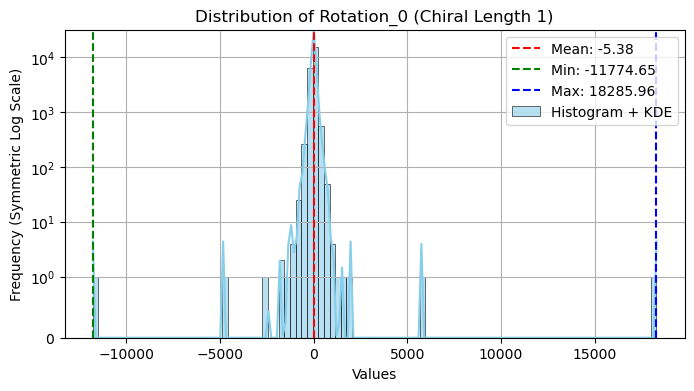

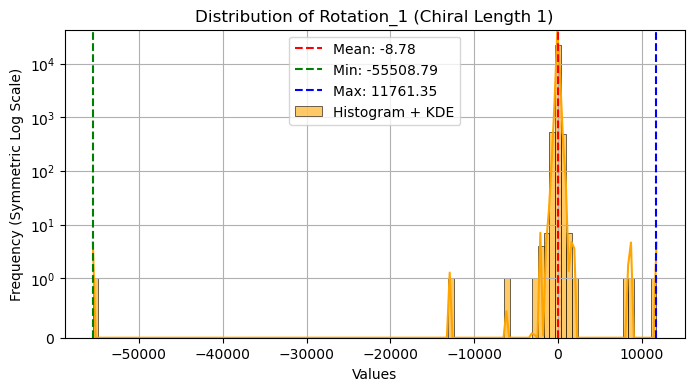

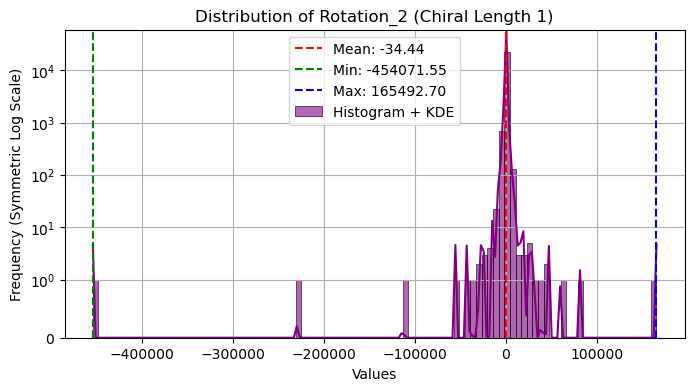

Ratio of values above 0 for Rotation_0: 0.48
Ratio of values below 0 for Rotation_0: 0.49
Ratio of values above 0 for Rotation_1: 0.48
Ratio of values below 0 for Rotation_1: 0.50
Ratio of values above 0 for Rotation_2: 0.49
Ratio of values below 0 for Rotation_2: 0.50


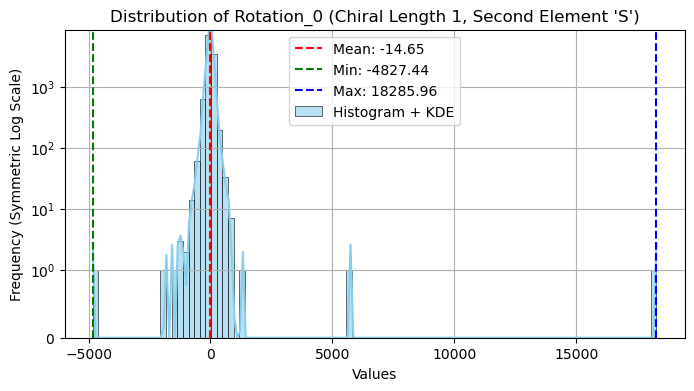

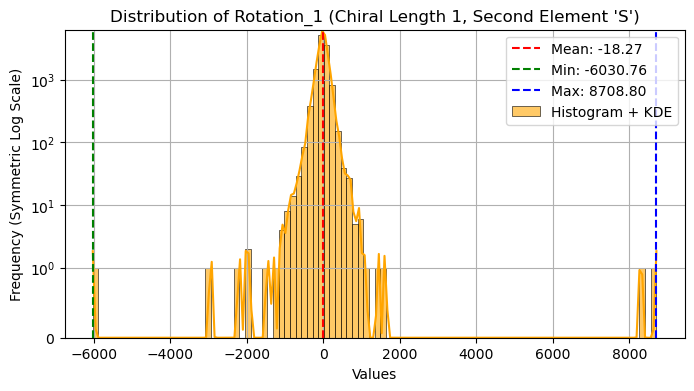

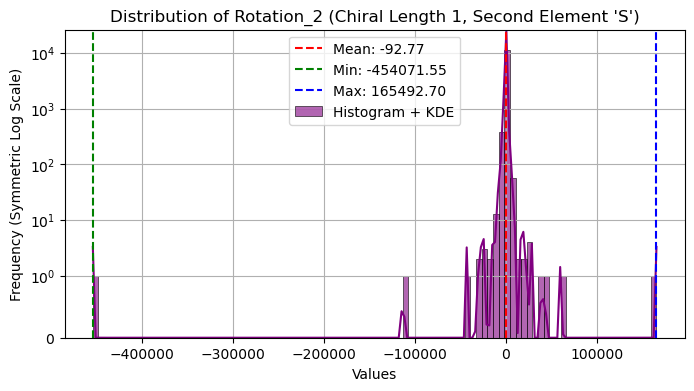

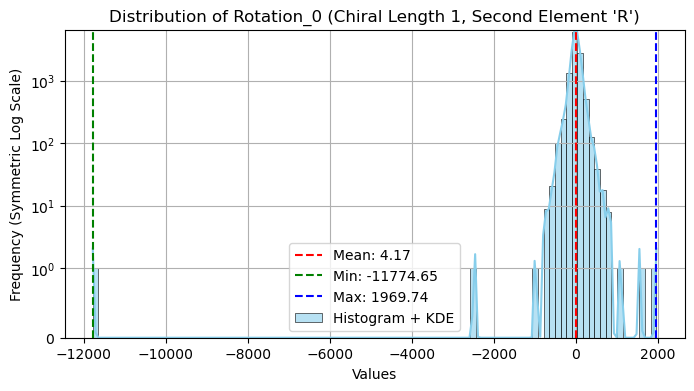

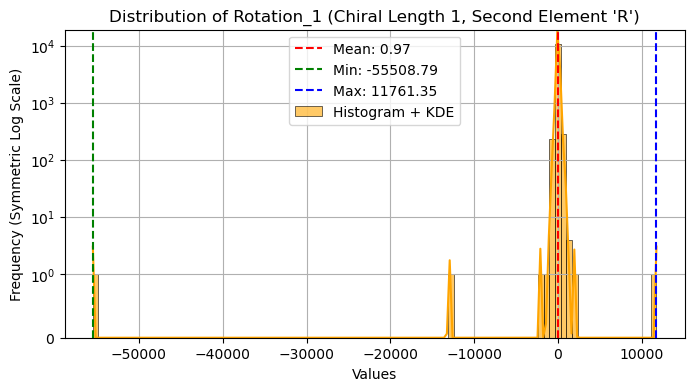

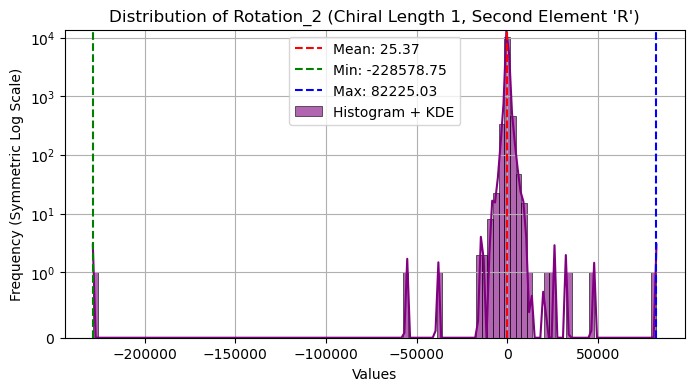

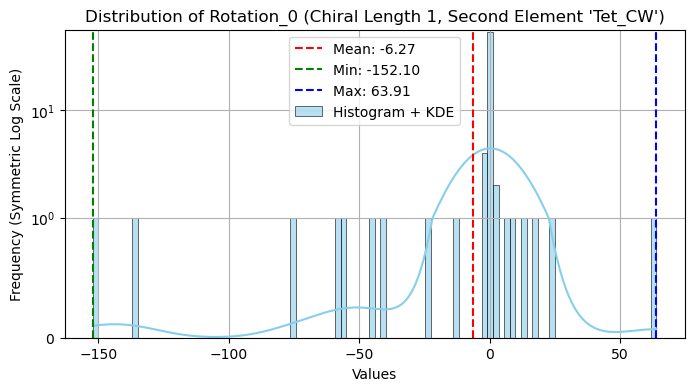

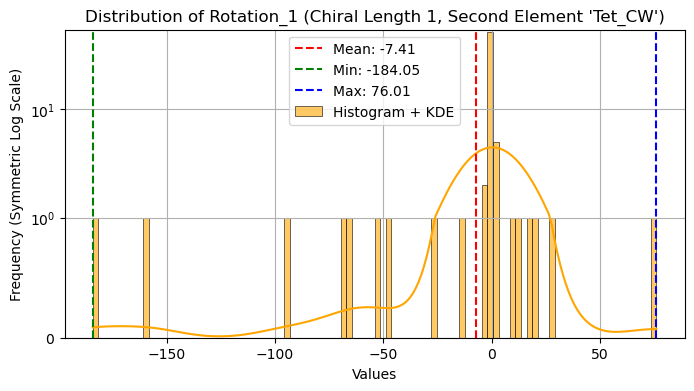

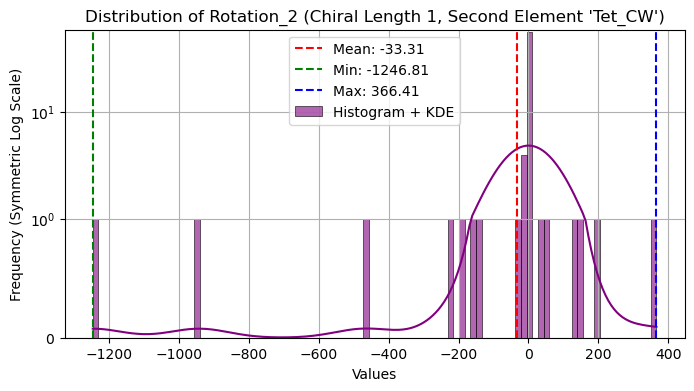

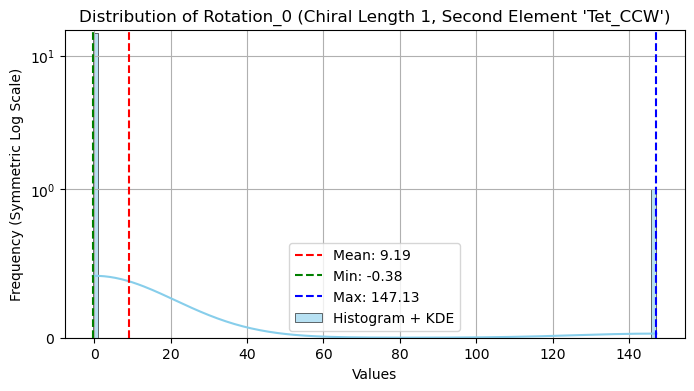

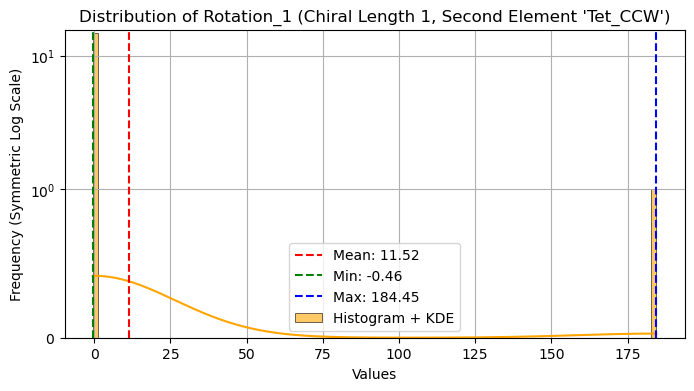

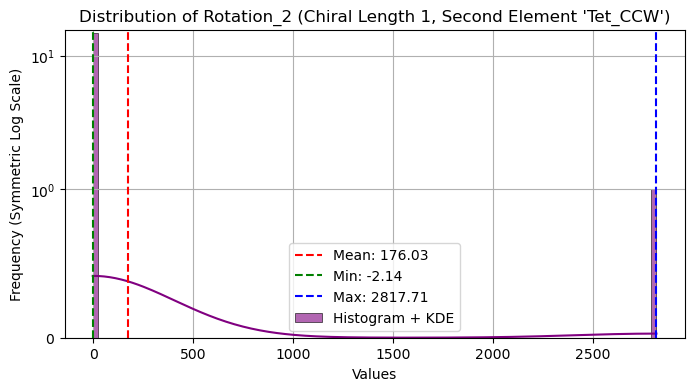

In [21]:
# given a molecule has chiral_length 1, what is the distriobution of distribution of rotation0, rotation1, rotation2

# Filter molecules with chiral length 1
chiral_centers_array_length_1 = [chiral_centers for chiral_centers in chiral_centers_array if len(chiral_centers) == 1]

# Extract rotation values for molecules with chiral length 1
rotation_0_length_1 = [rotation[0] for i, rotation in enumerate(rotation_array) if len(chiral_centers_array[i]) == 1]
rotation_1_length_1 = [rotation[1] for i, rotation in enumerate(rotation_array) if len(chiral_centers_array[i]) == 1]
rotation_2_length_1 = [rotation[2] for i, rotation in enumerate(rotation_array) if len(chiral_centers_array[i]) == 1]

# Plot distributions for rotation_0, rotation_1, and rotation_2 with symlog y-axis
plot_distribution_with_symlog(rotation_0_length_1, "Distribution of Rotation_0 (Chiral Length 1)", color="skyblue")
plot_distribution_with_symlog(rotation_1_length_1, "Distribution of Rotation_1 (Chiral Length 1)", color="orange")
plot_distribution_with_symlog(rotation_2_length_1, "Distribution of Rotation_2 (Chiral Length 1)", color="purple")

# print ratio of values above 0 for rotation 0, and values below 0 for rotation 0
rotation_0_array = np.array(rotation_0)
rotation_0_positive_ratio = np.mean(rotation_0_array > 0)
rotation_0_negative_ratio = np.mean(rotation_0_array < 0)

print(f"Ratio of values above 0 for Rotation_0: {rotation_0_positive_ratio:.2f}")
print(f"Ratio of values below 0 for Rotation_0: {rotation_0_negative_ratio:.2f}")

# print ratio of values above 0 for rotation 1, and values below 0 for rotation 1
rotation_1_array = np.array(rotation_1)
rotation_1_positive_ratio = np.mean(rotation_1_array > 0)
rotation_1_negative_ratio = np.mean(rotation_1_array < 0)

print(f"Ratio of values above 0 for Rotation_1: {rotation_1_positive_ratio:.2f}")
print(f"Ratio of values below 0 for Rotation_1: {rotation_1_negative_ratio:.2f}")

# print ratio of values above 0 for rotation 2, and values below 0 for rotation 2
rotation_2_array = np.array(rotation_2)
rotation_2_positive_ratio = np.mean(rotation_2_array > 0)
rotation_2_negative_ratio = np.mean(rotation_2_array < 0)

print(f"Ratio of values above 0 for Rotation_2: {rotation_2_positive_ratio:.2f}")
print(f"Ratio of values below 0 for Rotation_2: {rotation_2_negative_ratio:.2f}")

# for molecules qith chiral length of 1
# given the second element is 'S' what is the distribution of rotation 0, rotation 1, rotation 2
# Filter molecules with chiral length 1 and second element 'S'
rotation_0_length_1_S = [rotation[0] for i, rotation in enumerate(rotation_array) if len(chiral_centers_array[i]) == 1 and chiral_centers_array[i][0][1] == 'S']
rotation_1_length_1_S = [rotation[1] for i, rotation in enumerate(rotation_array) if len(chiral_centers_array[i]) == 1 and chiral_centers_array[i][0][1] == 'S']
rotation_2_length_1_S = [rotation[2] for i, rotation in enumerate(rotation_array) if len(chiral_centers_array[i]) == 1 and chiral_centers_array[i][0][1] == 'S']

# Plot distributions for rotation_0, rotation_1, and rotation_2 with symlog y-axis
plot_distribution_with_symlog(rotation_0_length_1_S, "Distribution of Rotation_0 (Chiral Length 1, Second Element 'S')", color="skyblue")
plot_distribution_with_symlog(rotation_1_length_1_S, "Distribution of Rotation_1 (Chiral Length 1, Second Element 'S')", color="orange")
plot_distribution_with_symlog(rotation_2_length_1_S, "Distribution of Rotation_2 (Chiral Length 1, Second Element 'S')", color="purple")

# given the second element is 'R'  what is the distribution of rotation 0, rotation 1, rotation 2
# Filter molecules with chiral length 1 and second element 'R'
rotation_0_length_1_R = [rotation[0] for i, rotation in enumerate(rotation_array) if len(chiral_centers_array[i]) == 1 and chiral_centers_array[i][0][1] == 'R']
rotation_1_length_1_R = [rotation[1] for i, rotation in enumerate(rotation_array) if len(chiral_centers_array[i]) == 1 and chiral_centers_array[i][0][1] == 'R']
rotation_2_length_1_R = [rotation[2] for i, rotation in enumerate(rotation_array) if len(chiral_centers_array[i]) == 1 and chiral_centers_array[i][0][1] == 'R']

# Plot distributions for rotation_0, rotation_1, and rotation_2 with symlog y-axis
plot_distribution_with_symlog(rotation_0_length_1_R, "Distribution of Rotation_0 (Chiral Length 1, Second Element 'R')", color="skyblue")
plot_distribution_with_symlog(rotation_1_length_1_R, "Distribution of Rotation_1 (Chiral Length 1, Second Element 'R')", color="orange")
plot_distribution_with_symlog(rotation_2_length_1_R, "Distribution of Rotation_2 (Chiral Length 1, Second Element 'R')", color="purple")


# Tet_CW
rotation_0_length_1_Tet_CW = [rotation[0] for i, rotation in enumerate(rotation_array) if len(chiral_centers_array[i]) == 1 and chiral_centers_array[i][0][1] == 'Tet_CW']
rotation_1_length_1_Tet_CW = [rotation[1] for i, rotation in enumerate(rotation_array) if len(chiral_centers_array[i]) == 1 and chiral_centers_array[i][0][1] == 'Tet_CW']
rotation_2_length_1_Tet_CW = [rotation[2] for i, rotation in enumerate(rotation_array) if len(chiral_centers_array[i]) == 1 and chiral_centers_array[i][0][1] == 'Tet_CW']

# Plot distributions for rotation_0, rotation_1, and rotation_2 with symlog y-axis
plot_distribution_with_symlog(rotation_0_length_1_Tet_CW, "Distribution of Rotation_0 (Chiral Length 1, Second Element 'Tet_CW')", color="skyblue")
plot_distribution_with_symlog(rotation_1_length_1_Tet_CW, "Distribution of Rotation_1 (Chiral Length 1, Second Element 'Tet_CW')", color="orange")
plot_distribution_with_symlog(rotation_2_length_1_Tet_CW, "Distribution of Rotation_2 (Chiral Length 1, Second Element 'Tet_CW')", color="purple")

# Tet_CCW
rotation_0_length_1_Tet_CCW = [rotation[0] for i, rotation in enumerate(rotation_array) if len(chiral_centers_array[i]) == 1 and chiral_centers_array[i][0][1] == 'Tet_CCW']
rotation_1_length_1_Tet_CCW = [rotation[1] for i, rotation in enumerate(rotation_array) if len(chiral_centers_array[i]) == 1 and chiral_centers_array[i][0][1] == 'Tet_CCW']
rotation_2_length_1_Tet_CCW = [rotation[2] for i, rotation in enumerate(rotation_array) if len(chiral_centers_array[i]) == 1 and chiral_centers_array[i][0][1] == 'Tet_CCW']

# Plot distributions for rotation_0, rotation_1, and rotation_2 with symlog y-axis
plot_distribution_with_symlog(rotation_0_length_1_Tet_CCW, "Distribution of Rotation_0 (Chiral Length 1, Second Element 'Tet_CCW')", color="skyblue")
plot_distribution_with_symlog(rotation_1_length_1_Tet_CCW, "Distribution of Rotation_1 (Chiral Length 1, Second Element 'Tet_CCW')", color="orange")
plot_distribution_with_symlog(rotation_2_length_1_Tet_CCW, "Distribution of Rotation_2 (Chiral Length 1, Second Element 'Tet_CCW')", color="purple")



In [8]:
class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FFNN, self).__init__()
        # Input to hidden layer
        self.fc1 = nn.Linear(input_size, hidden_size)
        # Hidden to output layer
        self.fc2 = nn.Linear(hidden_size, output_size)
        # Activation function
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # Pass through the first fully connected layer
        x = self.fc1(x)
        x = self.relu(x)
        # Pass through the second fully connected layer
        x = self.fc2(x)
        
        return x

In [8]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import torch.nn.functional as F
import sys
import re
from sklearn.metrics import f1_score, precision_score, recall_score


def read_data(filename):
    data = np.load(filename, allow_pickle=True)
    df = pd.DataFrame(data.tolist() if data.dtype == 'O' and isinstance(data[0], dict) else data)
    return df


def npy_preprocessor(filename):
    df = read_data(filename)
    return df['index'].values, df['inchi'].values, df['xyz'].values, df['chiral_centers'].values, df['rotation'].values


def filter_data(index_array, xyz_arrays, chiral_centers_array, rotation_array, task):
    if task == 0:
        filtered_indices = [i for i in range(len(index_array))]
        filtered_index_array = [index_array[i] for i in filtered_indices]
        filtered_xyz_arrays = [xyz_arrays[i] for i in filtered_indices]
        filtered_chiral_centers_array = [chiral_centers_array[i] for i in filtered_indices]
        filtered_rotation_array = [rotation_array[i] for i in filtered_indices]
        return filtered_index_array, filtered_xyz_arrays, filtered_chiral_centers_array, filtered_rotation_array

    if task == 1:
        #return only chiral_length <2
        filtered_indices = [i for i in range(len(index_array)) if len(chiral_centers_array[i]) < 2]
        filtered_index_array = [index_array[i] for i in filtered_indices]
        filtered_xyz_arrays = [xyz_arrays[i] for i in filtered_indices]
        filtered_chiral_centers_array = [chiral_centers_array[i] for i in filtered_indices]
        filtered_rotation_array = [rotation_array[i] for i in filtered_indices]
        return filtered_index_array, filtered_xyz_arrays, filtered_chiral_centers_array, filtered_rotation_array

    elif task == 2:
        #only return chiral legnth < 5
        filtered_indices = [i for i in range(len(index_array)) if len(chiral_centers_array[i]) < 5]
        filtered_index_array = [index_array[i] for i in filtered_indices]
        filtered_xyz_arrays = [xyz_arrays[i] for i in filtered_indices]
        filtered_chiral_centers_array = [chiral_centers_array[i] for i in filtered_indices]
        filtered_rotation_array = [rotation_array[i] for i in filtered_indices]
        return filtered_index_array, filtered_xyz_arrays, filtered_chiral_centers_array, filtered_rotation_array
    elif task == 3: 
        # Step 1: Filter indices where the length of chiral_centers_array is exactly 1 and the first tuple contains 'R' or 'S'
        filtered_indices = [i for i in range(len(index_array)) if len(chiral_centers_array[i]) == 1 and ('R' == chiral_centers_array[i][0][1] or 'S' == chiral_centers_array[i][0][1])]
        # Step 2: Create filtered arrays for index_array, xyz_arrays, chiral_centers_array, and rotation_array
        filtered_index_array = [index_array[i] for i in filtered_indices]
        filtered_xyz_arrays = [xyz_arrays[i] for i in filtered_indices]
        
        filtered_chiral_centers_array = [chiral_centers_array[i] for i in filtered_indices]
        
        # Step 5: Filter the rotation_array accordingly
        filtered_rotation_array = [rotation_array[i] for i in filtered_indices]
        return filtered_index_array, filtered_xyz_arrays, filtered_chiral_centers_array, filtered_rotation_array
    
    elif task == 4:
        # only return chiral_length == 1
        filtered_indices = [i for i in range(len(index_array)) if len(chiral_centers_array[i]) == 1]
        filtered_index_array = [index_array[i] for i in filtered_indices]
        filtered_xyz_arrays = [xyz_arrays[i] for i in filtered_indices]
        filtered_chiral_centers_array = [chiral_centers_array[i] for i in filtered_indices]
        filtered_rotation_array = [rotation_array[i] for i in filtered_indices]
        return filtered_index_array, filtered_xyz_arrays, filtered_chiral_centers_array, filtered_rotation_array
    elif task == 5:
        filtered_indices = [i for i in range(len(index_array))]
        filtered_index_array = [index_array[i] for i in filtered_indices]
        filtered_xyz_arrays = [xyz_arrays[i] for i in filtered_indices]
        filtered_chiral_centers_array = [chiral_centers_array[i] for i in filtered_indices]
        filtered_rotation_array = [rotation_array[i] for i in filtered_indices]
        return filtered_index_array, filtered_xyz_arrays, filtered_chiral_centers_array, filtered_rotation_array


def generate_label(index_array, xyz_arrays, chiral_centers_array, rotation_array, task):
    # Task 0 or Task 1: Binary classification based on the presence of chiral centers
    if task == 0 or task == 1:
        return [1 if len(chiral_centers) > 0 else 0 for chiral_centers in chiral_centers_array]
    
    # Task 2: Return the number of chiral centers
    elif task == 2:
        return [len(chiral_centers) for chiral_centers in chiral_centers_array]
    
    # Task 3: Assuming that the task is to return something from chiral_centers_array, not rotation_array
    elif task == 3:
        return [1 if 'R' == chiral_centers[0][1] else 0 for chiral_centers in chiral_centers_array]
    
    # Task 4 or Task 5: Binary classification based on posneg value in rotation_array
    elif task == 4 or task == 5:
        return [1 if posneg[0] > 0 else 0 for posneg in rotation_array]

def generate_label_array(index_array, xyz_arrays, chiral_centers_array, rotation_array, task):
    # Fix to directly return the output of generate_label
    return generate_label(index_array, xyz_arrays, chiral_centers_array, rotation_array, task)

# 121416 item, each associated with a 27 row, 8 col matrix, apply global normalization to col 0,1,2 Rescaling data to a [0, 1]

def reflect_wrt_plane(xyz, plane_normal=[0, 0, 1]):
    plane_normal = plane_normal / np.linalg.norm(plane_normal)
    d = np.dot(xyz, plane_normal)
    return xyz - 2 * np.outer(d, plane_normal)

def rotate_xyz(xyz, angles):
    theta_x, theta_y, theta_z = np.radians(angles)
    Rx = np.array([[1,0,0],
                   [0,np.cos(theta_x),-np.sin(theta_x)],
                   [0,np.sin(theta_x), np.cos(theta_x)]])
    Ry = np.array([[ np.cos(theta_y),0,np.sin(theta_y)],
                   [0,1,0],
                   [-np.sin(theta_y),0,np.cos(theta_y)]])
    Rz = np.array([[np.cos(theta_z),-np.sin(theta_z),0],
                   [np.sin(theta_z), np.cos(theta_z),0],
                   [0,0,1]])
    R = Rz @ Ry @ Rx
    return np.dot(xyz, R.T)

def split_data(index_array, xyz_arrays, chiral_centers_array, rotation_array):
    train_idx, test_idx = train_test_split(range(len(index_array)), test_size=0.1, random_state=42)
    train_idx, val_idx = train_test_split(train_idx, test_size=0.05, random_state=42)

    def subset(indices):
        return ([index_array[i] for i in indices],
                [xyz_arrays[i] for i in indices],
                [chiral_centers_array[i] for i in indices],
                [rotation_array[i] for i in indices])
    return subset(train_idx), subset(val_idx), subset(test_idx)

def normalize_xyz_train(xyz_arrays):
    x_array = np.array([xyz[:,0] for xyz in xyz_arrays])
    y_array = np.array([xyz[:,1] for xyz in xyz_arrays])
    z_array = np.array([xyz[:,2] for xyz in xyz_arrays])
    min_val = min(np.min(x_array), np.min(y_array), np.min(z_array))
    max_val = max(np.max(x_array), np.max(y_array), np.max(z_array))
    return min_val, max_val, [((xyz[:,:3]-min_val)/(max_val-min_val)) for xyz in xyz_arrays]

def apply_normalization(xyz_arrays, min_val, max_val):
    return [((xyz[:,:3]-min_val)/(max_val-min_val)) for xyz in xyz_arrays]

def augment_dataset(index_array, xyz_arrays, chiral_centers_array, rotation_array, label_array, task):
    aug_idx, aug_xyz, aug_chiral, aug_rot, aug_label = list(index_array), list(xyz_arrays), list(chiral_centers_array), list(rotation_array), list(label_array)
    for i in range(len(index_array)):
        if len(chiral_centers_array[i]) == 1:
            reflected_xyz = xyz_arrays[i].copy()
            reflected_xyz[:, :3] = reflect_wrt_plane(xyz_arrays[i][:, :3], [0,0,1])
            reflected_label = label_array[i]
            if task == 3: reflected_label = 1 - reflected_label
            elif task in [4,5]: reflected_label = -reflected_label
            aug_idx.append(index_array[i])
            aug_xyz.append(reflected_xyz)
            aug_chiral.append(chiral_centers_array[i])
            aug_rot.append(rotation_array[i])
            aug_label.append(reflected_label)
    return aug_idx, aug_xyz, aug_chiral, aug_rot, aug_label

# take in argument from shell task
task = int(sys.argv[1])


# Neural Network Model
class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FFNN, self).__init__()
        # Move layers to the specified device
        self.fc1 = nn.Linear(input_size, hidden_size).to(device)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size).to(device)
        self.device = device
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x



# Accuracy and Metrics Calculation
def evaluate_model(model, test_loader, criterion, task, test):
    model.eval()
    all_labels = []
    all_predictions = []
    running_loss = 0.0

    with torch.no_grad():
        for data, labels in test_loader:
            data, labels = data.to(device), labels.to(device)
            outputs = model(data)
            
            loss = criterion(outputs.squeeze(), labels)
            running_loss += loss.item()

            if task == 2:  # Multi-class task
                predictions = torch.argmax(outputs, dim=1)
            else:  # Binary task
                predictions = torch.sigmoid(outputs).round()
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = running_loss / len(test_loader)
    accuracy = (np.array(all_predictions) == np.array(all_labels)).mean() * 100
    precision = precision_score(all_labels, all_predictions, average='macro' if task == 2 else 'binary')
    recall = recall_score(all_labels, all_predictions, average='macro' if task == 2 else 'binary')
    f1 = f1_score(all_labels, all_predictions, average='macro' if task == 2 else 'binary')
    if test:
        cm = confusion_matrix(all_labels, all_predictions)
        print("\nConfusion Matrix:")
        print(cm)
    return avg_loss, accuracy, precision, recall, f1

# Main Training Function
def train_model(train_data, val_data, test_data, task, num_epochs=50, batch_size=16, learning_rate=0.0001):
    # Unpack and normalize data
    train_idx, train_xyz, _, _ = train_data
    val_idx, val_xyz, _, _ = val_data
    test_idx, test_xyz, _, _ = test_data

    min_val, max_val, train_xyz = normalize_xyz_train(train_xyz)
    val_xyz = apply_normalization(val_xyz, min_val, max_val)
    test_xyz = apply_normalization(test_xyz, min_val, max_val)



    # Convert to tensors
    train_labels = torch.tensor(generate_label_array(train_idx, [], train_data[2], train_data[3], task), dtype=torch.float32)
    val_labels = torch.tensor(generate_label_array(val_idx, [], val_data[2], val_data[3], task), dtype=torch.float32)
    test_labels = torch.tensor(generate_label_array(test_idx, [], test_data[2], test_data[3], task), dtype=torch.float32)


    train_tensor = torch.tensor(np.array(train_xyz), dtype=torch.float32)
    val_tensor = torch.tensor(np.array(val_xyz), dtype=torch.float32)
    test_tensor = torch.tensor(np.array(test_xyz), dtype=torch.float32)


    train_tensor = train_tensor.view(train_tensor.size(0), -1)  # Shape: (N, 27*3)
    val_tensor = val_tensor.view(val_tensor.size(0), -1)
    test_tensor = test_tensor.view(test_tensor.size(0), -1)


    train_dataset = TensorDataset(train_tensor, train_labels)
    val_dataset = TensorDataset(val_tensor, val_labels)
    test_dataset = TensorDataset(test_tensor, test_labels)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Model setup
    input_size = train_tensor.shape[1]
    output_size = 5 if task == 2 else 1
    model = FFNN(input_size, 256, output_size).to(device)

    criterion = nn.CrossEntropyLoss() if task == 2 else nn.BCEWithLogitsLoss()
    
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(data)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Evaluation on validation data
        val_loss, val_acc, val_prec, val_recall, val_f1 = evaluate_model(model, val_loader, criterion, task, test=False)

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss:.4f}, Val F1: {val_f1:.4f}")

    # Final Test Evaluation
    test_loss, test_acc, test_prec, test_recall, test_f1 = evaluate_model(model, test_loader, criterion, task, test=True)
    print(f"Final Test Loss: {test_loss:.4f}, Accuracy: {test_acc:.2f}%, Precision: {test_prec:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")
    return model

# Load and preprocess data
index_array, inchi_array, xyz_arrays, chiral_centers_array, rotation_array = npy_preprocessor('qm9_filtered.npy')
if task == 4 or task == 5:
    #print distribution of labels as a ratio
    print("Distribution of Labels:")
    print(pd.Series(generate_label_array(index_array, xyz_arrays, chiral_centers_array, rotation_array, task)).value_counts(normalize=True))

# shell arg for task
task = 3

print("\nTASK:", task)
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
filtered_index, filtered_xyz, filtered_chiral, filtered_rotation = filter_data(index_array, xyz_arrays, chiral_centers_array, rotation_array, task)
train_data, val_data, test_data = split_data(filtered_index, filtered_xyz, filtered_chiral, filtered_rotation)

model = train_model(train_data, val_data,  test_data, num_epochs=50, task=task)

(22973, 27, 8)
Train size: 18378, Test size: 4595


/var/folders/mq/wny4bz610dgcnm6rrh8skcwc0000gn/T/ipykernel_51264/3735449773.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(train_labels)
/var/folders/mq/wny4bz610dgcnm6rrh8skcwc0000gn/T/ipykernel_51264/3735449773.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_labels_tensor = torch.tensor(test_labels)


Epoch [1/50], Loss: 0.7405
Epoch [2/50], Loss: 0.8426
Epoch [3/50], Loss: 0.7786
Epoch [4/50], Loss: 0.6267
Epoch [5/50], Loss: 0.5770
Test F1 Score: 0.6801
[[1311 1003]
 [ 589 1692]]
Epoch [6/50], Loss: 0.3996
Epoch [7/50], Loss: 0.6920
Epoch [8/50], Loss: 0.5274
Epoch [9/50], Loss: 0.3439
Epoch [10/50], Loss: 0.2728
Test F1 Score: 0.6741
[[1564  750]
 [ 740 1541]]
Epoch [11/50], Loss: 0.6264
Epoch [12/50], Loss: 0.4592
Epoch [13/50], Loss: 0.3888
Epoch [14/50], Loss: 0.6193
Epoch [15/50], Loss: 0.6512
Test F1 Score: 0.6625
[[1704  610]
 [ 849 1432]]
Epoch [16/50], Loss: 0.5575
Epoch [17/50], Loss: 0.2784
Epoch [18/50], Loss: 0.5614
Epoch [19/50], Loss: 0.3937
Epoch [20/50], Loss: 0.3806
Test F1 Score: 0.6887
[[1674  640]
 [ 747 1534]]
Epoch [21/50], Loss: 0.4497
Epoch [22/50], Loss: 0.2973
Epoch [23/50], Loss: 0.2437
Epoch [24/50], Loss: 0.2268
Epoch [25/50], Loss: 0.2656
Test F1 Score: 0.7048
[[1598  716]
 [ 650 1631]]
Epoch [26/50], Loss: 0.2006
Epoch [27/50], Loss: 0.3803
Epoch [2

In [9]:
from dataset import npy_preprocessor, filter_data, generate_label_array
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import torch.nn.functional as F
import sys


def get_atom_type(atom):
    """
    Assigns an atom type based on one-hot encoding. Returns a type index between 0 and 5.
    """
    atom_type = 0  # Default value
    if atom[3] == 1:
        atom_type = 1
    elif atom[4] == 1:
        atom_type = 2
    elif atom[5] == 1:
        atom_type = 3
    elif atom[6] == 1:
        atom_type = 4
    elif atom[7] == 1:
        atom_type = 5
    return atom_type

def process_xyz(xyz_arrays):
    new_xyz_arrays = []
    for xyz_array in xyz_arrays:
        new_xyz_array = []
        for idx, atom in enumerate(xyz_array):
            new_atom = [0] * 3
            new_atom[:3] = atom[:3]  # Copy x, y, z coordinates

            # Append processed atom to the new array
            new_xyz_array.append(new_atom)
        new_xyz_arrays.append(new_xyz_array)
    return new_xyz_arrays

device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")

task = 3

# Load and process data
index_array, inchi_array, xyz_arrays, chiral_centers_array, rotation_array = npy_preprocessor('qm9_filtered.npy')

index_array, xyz_arrays, chiral_centers_array, rotation_array = filter_data(index_array, xyz_arrays, chiral_centers_array, rotation_array, task)

xyz_arrays = process_xyz(xyz_arrays)

#print length of xyz_arrays
print(len(xyz_arrays))

#print number of items in the first element of xyz_arrays
print(xyz_arrays[0])

# Convert xyz_array to numeric data (float32)
xyz_array = np.array(xyz_arrays, dtype=np.float32)

# Flatten xyz array to 1D
xyz_array = xyz_array.reshape(xyz_array.shape[0], -1)


# Generate appropriate classification labels (binary or multi-class)
label_array = generate_label_array(index_array, xyz_arrays, chiral_centers_array, rotation_array, task)

# Convert labels to a tensor
label_array = torch.tensor(label_array, dtype=torch.float32 if task != 2 else torch.long)

# Split the original data before augmentation
train_size = int(0.8 * len(xyz_array))
test_size = len(xyz_array) - train_size
train_xyz, test_xyz, train_labels, test_labels = train_test_split(xyz_array, label_array, test_size=test_size, train_size=train_size)

print(f'Train size: {train_xyz.shape[0]}, Test size: {test_xyz.shape[0]}')  

# Convert to tensors
train_xyz_tensor = torch.tensor(train_xyz, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels)
test_xyz_tensor = torch.tensor(test_xyz, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels)

# Create DataLoader for training
train_dataset = TensorDataset(train_xyz_tensor, train_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Hyperparameters
input_size = train_xyz.shape[1]  # Number of features
hidden_size = 512  # Number of neurons in the hidden layer
output_size = 5 if task == 2 else 1  # 5-class for task 2, binary otherwise
learning_rate = 0.0005
num_epochs = 50

# Initialize the neural network
model = FFNN(input_size, hidden_size, output_size).to(device)

# Set criterion based on task type (binary or multi-class)
if task == 2:
    criterion = nn.CrossEntropyLoss()
else:
    criterion = nn.BCEWithLogitsLoss()

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        # Forward pass
        outputs = model(data)
        
        if task == 2:
            loss = criterion(outputs, target)
        else:
            loss = criterion(outputs.squeeze(), target)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    if (epoch+1) % 5 == 0:
        # Evaluation on test data
        model.eval()
        with torch.no_grad():
            test_outputs = model(test_xyz_tensor.to(device)).squeeze()
            
            if task == 2:
                test_preds = torch.argmax(test_outputs, dim=1).cpu().numpy()
            else:
                test_preds = torch.sigmoid(test_outputs).round().cpu().numpy()

            f1 = f1_score(test_labels, test_preds, average='macro' if task == 2 else 'binary')
            print(f'Test F1 Score: {f1:.4f}')
            print(confusion_matrix(test_labels, test_preds))
        model.train()



22973
[[0.0794413945, 1.5181364774, 0.1014671709], [0.0438274363, -0.0026403, -0.0811416587], [-1.2494453405, -0.6310529088, 0.2358392519], [-2.0033601754, -0.1162049342, -0.2138624567], [-0.3823255093, -2.2917759163, -1.1269077876], [-1.4288951888, -0.5846314746, 1.2337862027], [0.4223712874, -0.3949616614, -1.5162395157], [0.3420762404, -1.8357262861, -1.667210931], [1.1926357281, -2.5430519535, -2.4390098697], [2.0952741806, -2.0926897836, -3.1151880651], [0.9267505452, -3.999475228, -2.3913107245], [0.7468400121, -5.1407224709, -2.3787680021], [1.0702416447, 1.9271284225, -0.1235690432], [-0.6444709378, 2.007041072, -0.5614452062], [-0.1713666774, 1.7890850902, 1.1315722763], [0.780759294, -0.4618063841, 0.5894109993], [-0.256185231, 0.1013640359, -2.2264727984], [1.4379305068, -0.0790019166, -1.7634880721], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]
Train size: 18378, Test

/var/folders/mq/wny4bz610dgcnm6rrh8skcwc0000gn/T/ipykernel_52716/1630284541.py:82: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(train_labels)
/var/folders/mq/wny4bz610dgcnm6rrh8skcwc0000gn/T/ipykernel_52716/1630284541.py:84: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_labels_tensor = torch.tensor(test_labels)


Epoch [1/50], Loss: 0.6642
Epoch [2/50], Loss: 0.7829
Epoch [3/50], Loss: 0.7873
Epoch [4/50], Loss: 0.7262
Epoch [5/50], Loss: 0.6478
Test F1 Score: 0.6330
[[1399  939]
 [ 777 1480]]
Epoch [6/50], Loss: 0.7999
Epoch [7/50], Loss: 0.7559
Epoch [8/50], Loss: 0.6549
Epoch [9/50], Loss: 0.6272
Epoch [10/50], Loss: 0.6001
Test F1 Score: 0.6607
[[1315 1023]
 [ 639 1618]]
Epoch [11/50], Loss: 0.6241
Epoch [12/50], Loss: 0.7752
Epoch [13/50], Loss: 0.5600
Epoch [14/50], Loss: 0.4516
Epoch [15/50], Loss: 0.3263
Test F1 Score: 0.6368
[[1656  682]
 [ 884 1373]]
Epoch [16/50], Loss: 0.6000
Epoch [17/50], Loss: 0.4612
Epoch [18/50], Loss: 0.4979
Epoch [19/50], Loss: 0.5219
Epoch [20/50], Loss: 0.6128
Test F1 Score: 0.6301
[[1638  700]
 [ 897 1360]]
Epoch [21/50], Loss: 0.4807
Epoch [22/50], Loss: 0.6130
Epoch [23/50], Loss: 0.6423
Epoch [24/50], Loss: 0.3157
Epoch [25/50], Loss: 0.3610
Test F1 Score: 0.6548
[[1606  732]
 [ 802 1455]]
Epoch [26/50], Loss: 0.5318
Epoch [27/50], Loss: 0.4718
Epoch [2

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import torch.nn.functional as F
import sys
import re
from sklearn.metrics import f1_score, precision_score, recall_score


def read_data(filename):
    data = np.load(filename, allow_pickle=True)
    df = pd.DataFrame(data.tolist() if data.dtype == 'O' and isinstance(data[0], dict) else data)
    return df


def npy_preprocessor(filename):
    df = read_data(filename)
    return df['index'].values, df['inchi'].values, df['xyz'].values, df['chiral_centers'].values, df['rotation'].values


def filter_data(index_array, xyz_arrays, chiral_centers_array, rotation_array, task):
    if task == 0:
        filtered_indices = [i for i in range(len(index_array))]
        filtered_index_array = [index_array[i] for i in filtered_indices]
        filtered_xyz_arrays = [xyz_arrays[i] for i in filtered_indices]
        filtered_chiral_centers_array = [chiral_centers_array[i] for i in filtered_indices]
        filtered_rotation_array = [rotation_array[i] for i in filtered_indices]
        return filtered_index_array, filtered_xyz_arrays, filtered_chiral_centers_array, filtered_rotation_array

    if task == 1:
        #return only chiral_length <2
        filtered_indices = [i for i in range(len(index_array)) if len(chiral_centers_array[i]) < 2]
        filtered_index_array = [index_array[i] for i in filtered_indices]
        filtered_xyz_arrays = [xyz_arrays[i] for i in filtered_indices]
        filtered_chiral_centers_array = [chiral_centers_array[i] for i in filtered_indices]
        filtered_rotation_array = [rotation_array[i] for i in filtered_indices]
        return filtered_index_array, filtered_xyz_arrays, filtered_chiral_centers_array, filtered_rotation_array

    elif task == 2:
        #only return chiral legnth < 5
        filtered_indices = [i for i in range(len(index_array)) if len(chiral_centers_array[i]) < 5]
        filtered_index_array = [index_array[i] for i in filtered_indices]
        filtered_xyz_arrays = [xyz_arrays[i] for i in filtered_indices]
        filtered_chiral_centers_array = [chiral_centers_array[i] for i in filtered_indices]
        filtered_rotation_array = [rotation_array[i] for i in filtered_indices]
        return filtered_index_array, filtered_xyz_arrays, filtered_chiral_centers_array, filtered_rotation_array
    elif task == 3: 
        # Step 1: Filter indices where the length of chiral_centers_array is exactly 1 and the first tuple contains 'R' or 'S'
        filtered_indices = [i for i in range(len(index_array)) if len(chiral_centers_array[i]) == 1 and ('R' == chiral_centers_array[i][0][1] or 'S' == chiral_centers_array[i][0][1])]
        # Step 2: Create filtered arrays for index_array, xyz_arrays, chiral_centers_array, and rotation_array
        filtered_index_array = [index_array[i] for i in filtered_indices]
        filtered_xyz_arrays = [xyz_arrays[i] for i in filtered_indices]
        
        filtered_chiral_centers_array = [chiral_centers_array[i] for i in filtered_indices]
        
        # Step 5: Filter the rotation_array accordingly
        filtered_rotation_array = [rotation_array[i] for i in filtered_indices]
        return filtered_index_array, filtered_xyz_arrays, filtered_chiral_centers_array, filtered_rotation_array
    
    elif task == 4:
        # only return chiral_length == 1
        filtered_indices = [i for i in range(len(index_array)) if len(chiral_centers_array[i]) == 1]
        filtered_index_array = [index_array[i] for i in filtered_indices]
        filtered_xyz_arrays = [xyz_arrays[i] for i in filtered_indices]
        filtered_chiral_centers_array = [chiral_centers_array[i] for i in filtered_indices]
        filtered_rotation_array = [rotation_array[i] for i in filtered_indices]
        return filtered_index_array, filtered_xyz_arrays, filtered_chiral_centers_array, filtered_rotation_array
    elif task == 5:
        filtered_indices = [i for i in range(len(index_array))]
        filtered_index_array = [index_array[i] for i in filtered_indices]
        filtered_xyz_arrays = [xyz_arrays[i] for i in filtered_indices]
        filtered_chiral_centers_array = [chiral_centers_array[i] for i in filtered_indices]
        filtered_rotation_array = [rotation_array[i] for i in filtered_indices]
        return filtered_index_array, filtered_xyz_arrays, filtered_chiral_centers_array, filtered_rotation_array


def generate_label(index_array, xyz_arrays, chiral_centers_array, rotation_array, task):
    # Task 0 or Task 1: Binary classification based on the presence of chiral centers
    if task == 0 or task == 1:
        return [1 if len(chiral_centers) > 0 else 0 for chiral_centers in chiral_centers_array]
    
    # Task 2: Return the number of chiral centers
    elif task == 2:
        return [len(chiral_centers) for chiral_centers in chiral_centers_array]
    
    # Task 3: Assuming that the task is to return something from chiral_centers_array, not rotation_array
    elif task == 3:
        return [1 if 'R' == chiral_centers[0][1] else 0 for chiral_centers in chiral_centers_array]
    
    # Task 4 or Task 5: Binary classification based on posneg value in rotation_array
    elif task == 4 or task == 5:
        return [1 if posneg[0] > 0 else 0 for posneg in rotation_array]

def generate_label_array(index_array, xyz_arrays, chiral_centers_array, rotation_array, task):
    # Fix to directly return the output of generate_label
    return generate_label(index_array, xyz_arrays, chiral_centers_array, rotation_array, task)

# 121416 item, each associated with a 27 row, 8 col matrix, apply global normalization to col 0,1,2 Rescaling data to a [0, 1]

def reflect_wrt_plane(xyz, plane_normal=[0, 0, 1]):
    plane_normal = plane_normal / np.linalg.norm(plane_normal)
    d = np.dot(xyz, plane_normal)
    return xyz - 2 * np.outer(d, plane_normal)

def rotate_xyz(xyz, angles):
    theta_x, theta_y, theta_z = np.radians(angles)
    Rx = np.array([[1,0,0],
                   [0,np.cos(theta_x),-np.sin(theta_x)],
                   [0,np.sin(theta_x), np.cos(theta_x)]])
    Ry = np.array([[ np.cos(theta_y),0,np.sin(theta_y)],
                   [0,1,0],
                   [-np.sin(theta_y),0,np.cos(theta_y)]])
    Rz = np.array([[np.cos(theta_z),-np.sin(theta_z),0],
                   [np.sin(theta_z), np.cos(theta_z),0],
                   [0,0,1]])
    R = Rz @ Ry @ Rx
    return np.dot(xyz, R.T)

def split_data(index_array, xyz_arrays, chiral_centers_array, rotation_array):
    train_idx, test_idx = train_test_split(range(len(index_array)), test_size=0.1, random_state=42)
    train_idx, val_idx = train_test_split(train_idx, test_size=0.05, random_state=42)

    def subset(indices):
        return ([index_array[i] for i in indices],
                [xyz_arrays[i] for i in indices],
                [chiral_centers_array[i] for i in indices],
                [rotation_array[i] for i in indices])
    return subset(train_idx), subset(val_idx), subset(test_idx)

def normalize_xyz_train(xyz_arrays):
    # xyz_arrays: list of arrays each with shape (27, 8)
    # Normalize only columns 0,1,2 globally
    all_xyz = np.concatenate([xyz[:, :3] for xyz in xyz_arrays], axis=0) 
    min_val = all_xyz.min()
    max_val = all_xyz.max()

    norm_xyz = []
    for xyz in xyz_arrays:
        xyz_copy = xyz.copy()
        xyz_copy[:, :3] = (xyz_copy[:, :3] - min_val) / (max_val - min_val)
        norm_xyz.append(xyz_copy)
    return min_val, max_val, norm_xyz

def apply_normalization(xyz_arrays, min_val, max_val):
    norm_xyz = []
    for xyz in xyz_arrays:
        xyz_copy = xyz.copy()
        xyz_copy[:, :3] = (xyz_copy[:, :3] - min_val) / (max_val - min_val)
        norm_xyz.append(xyz_copy)
    return norm_xyz


def augment_dataset(index_array, xyz_arrays, chiral_centers_array, rotation_array, label_array, task):
    aug_idx, aug_xyz, aug_chiral, aug_rot, aug_label = list(index_array), list(xyz_arrays), list(chiral_centers_array), list(rotation_array), list(label_array)
    for i in range(len(index_array)):
        if len(chiral_centers_array[i]) == 1:
            reflected_xyz = xyz_arrays[i].copy()
            reflected_xyz[:, :3] = reflect_wrt_plane(xyz_arrays[i][:, :3], [0,0,1])
            reflected_label = label_array[i]
            if task == 3: reflected_label = 1 - reflected_label
            elif task in [4,5]: reflected_label = -reflected_label
            aug_idx.append(index_array[i])
            aug_xyz.append(reflected_xyz)
            aug_chiral.append(chiral_centers_array[i])
            aug_rot.append(rotation_array[i])
            aug_label.append(reflected_label)
    return aug_idx, aug_xyz, aug_chiral, aug_rot, aug_label

# Define device
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cuda" if torch.cuda.is_available() else "cpu")

# CNN Model
class CNN(nn.Module):
    def __init__(self, output_size):
        super(CNN, self).__init__()
        
        # Assuming input shape: N x 1 x 27 x 8
        # Conv layer 1 with padding to keep spatial size
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=64, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # After this: from (1,27,8) to (64, 13,4)
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, padding=2),
            nn.ReLU()
        )
        # After first conv+pool: Height: floor(27/2)=13, Width: floor(8/2)=4
        # Second conv keeps size the same (padding=2, kernel=5) -> (128,13,4)
        flatten_size = 128 * 13 * 4

        self.fc_layer = nn.Sequential(
            nn.Linear(flatten_size, output_size),
        )

    def forward(self, x):
        x = self.cnn_layers(x)   # N,128,13,4
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)
        return x

def weight_decay(cnn_model, l2_lambda, device):
    _reg = 0.0
    for param in cnn_model.parameters():
        _reg += torch.norm(param, 2)**2
    _reg = (l2_lambda / 2) * _reg
    return _reg

def evaluate_model(model, test_loader, criterion, task, test):
    model.eval()
    all_labels = []
    all_predictions = []
    running_loss = 0.0

    with torch.no_grad():
        for data, labels in test_loader:
            data, labels = data.to(device), labels.to(device)

            # Reshape to Nx1x27x8 for CNN
            data = data.unsqueeze(1)  # Add channel dimension

            outputs = model(data)
            
            if task == 2:
                loss = criterion(outputs, labels.long())
                predictions = torch.argmax(outputs, dim=1)
            else:
                # Binary
                outputs = torch.sigmoid(outputs)
                loss = criterion(outputs.squeeze(), labels)
                predictions = (outputs.squeeze() > 0.5).float()

            running_loss += loss.item()
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = running_loss / len(test_loader)
    accuracy = (np.array(all_predictions) == np.array(all_labels)).mean() * 100
    average_type = 'macro' if task == 2 else 'binary'
    precision = precision_score(all_labels, all_predictions, average=average_type, zero_division=0)
    recall = recall_score(all_labels, all_predictions, average=average_type, zero_division=0)
    f1 = f1_score(all_labels, all_predictions, average=average_type, zero_division=0)
    if test:
        cm = confusion_matrix(all_labels, all_predictions)
        print("\nConfusion Matrix:")
        print(cm)
    return avg_loss, accuracy, precision, recall, f1

# Parse task from command line
task = int(sys.argv[1])


def train_model(train_data, val_data, test_data, task, num_epochs=50, batch_size=16, learning_rate=0.0001, l2_lambda=1e-4):
    # Unpack data
    train_idx, train_xyz, train_chiral, train_rot = train_data
    val_idx, val_xyz, val_chiral, val_rot = val_data
    test_idx, test_xyz, test_chiral, test_rot = test_data

    # Normalize data
    min_val, max_val, train_xyz = normalize_xyz_train(train_xyz)
    val_xyz = apply_normalization(val_xyz, min_val, max_val)
    test_xyz = apply_normalization(test_xyz, min_val, max_val)

    train_labels_np = np.array(generate_label_array(train_idx, train_xyz, train_chiral, train_rot, task))
    val_labels_np = np.array(generate_label_array(val_idx, val_xyz, val_chiral, val_rot, task))
    test_labels_np = np.array(generate_label_array(test_idx, test_xyz, test_chiral, test_rot, task))

    # Convert to tensors
    train_tensor = torch.tensor(np.array(train_xyz), dtype=torch.float32)
    val_tensor = torch.tensor(np.array(val_xyz), dtype=torch.float32)
    test_tensor = torch.tensor(np.array(test_xyz), dtype=torch.float32)

    
    train_labels = torch.tensor(train_labels_np, dtype=torch.float32 if task != 2 else torch.long)
    val_labels = torch.tensor(val_labels_np, dtype=torch.float32 if task != 2 else torch.long)
    test_labels = torch.tensor(test_labels_np, dtype=torch.float32 if task != 2 else torch.long)

    train_dataset = TensorDataset(train_tensor, train_labels)
    val_dataset = TensorDataset(val_tensor, val_labels)
    test_dataset = TensorDataset(test_tensor, test_labels)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Determine output size
    output_size = 5 if task == 2 else 1
    model = CNN(output_size).to(device)

    if task == 2:
        criterion = nn.CrossEntropyLoss()
    else:
        criterion = nn.BCELoss()

    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            # Reshape for CNN
            inputs = inputs.unsqueeze(1) # (N,1,27,8)

            optimizer.zero_grad()
            outputs = model(inputs)
            
            if task == 2:
                loss = criterion(outputs, labels)
            else:
                outputs = torch.sigmoid(outputs)
                loss = criterion(outputs.squeeze(), labels)
            
            # Add weight decay
            loss = loss + weight_decay(model, l2_lambda, device)
            
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        val_loss, val_acc, val_prec, val_recall, val_f1 = evaluate_model(model, val_loader, criterion, task, test=False)
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss:.4f}, Val F1: {val_f1:.4f}")

    # Final Test Evaluation
    test_loss, test_acc, test_prec, test_recall, test_f1 = evaluate_model(model, test_loader, criterion, task, test=True)
    print(f"Final Test Loss: {test_loss:.4f}, Accuracy: {test_acc:.2f}%, Precision: {test_prec:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")

    return model

# Load and preprocess data
index_array, inchi_array, xyz_arrays, chiral_centers_array, rotation_array = npy_preprocessor('qm9_filtered.npy')

if task == 4 or task == 5:
    print("Distribution of Labels:")
    print(pd.Series(generate_label_array(index_array, xyz_arrays, chiral_centers_array, rotation_array, task)).value_counts(normalize=True))

print("\nTASK:", task)
print(device)

filtered_index, filtered_xyz, filtered_chiral, filtered_rotation = filter_data(index_array, xyz_arrays, chiral_centers_array, rotation_array, task)
train_data, val_data, test_data = split_data(filtered_index, filtered_xyz, filtered_chiral, filtered_rotation)

model = train_model(train_data, val_data, test_data, task=task, num_epochs=50)

In [13]:
from dataset import npy_preprocessor, rotate_xyz, augment_dataset, evaluate_with_f1, filter_data, generate_label, generate_label_array
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import torch.nn.functional as F
import sys

device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")

class TransformerClassifier(nn.Module):
    def __init__(self, input_size, num_heads, num_layers, hidden_size, output_size):
        super(TransformerClassifier, self).__init__()
        # input_size should match the number of features per token, which is 4 in this case
        self.embedding = nn.Linear(input_size, hidden_size)
        self.positional_encoding = nn.Parameter(torch.randn(1, 100, hidden_size))  # Assume 32 max tokens here, update based on your data
        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_size, nhead=num_heads, dim_feedforward=512, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.fc_out = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        if x.size(-1) != self.embedding.in_features:
            # print("unmatched")
            x = x.transpose(1, 2)

        
        # Ensure positional encoding matches the input size dynamically
        seq_len = x.size(1)  # Get the sequence length (number of tokens/features)
        pos_encoding = self.positional_encoding[:, :seq_len, :]  # Adjust positional encoding to the input size
        x = self.embedding(x) + pos_encoding
        x = self.transformer_encoder(x)
        x = torch.mean(x, dim=1)  # Pooling over sequence dimension
        x = self.fc_out(x)
        return x



task = 3  # Change this variable to switch between tasks

# Load and process data
index_array, inchi_array, xyz_arrays, chiral_centers_array, rotation_array = npy_preprocessor('qm9_filtered.npy')

index_array, xyz_arrays, chiral_centers_array, rotation_array = filter_data(index_array, xyz_arrays, chiral_centers_array, rotation_array, task)

# print(xyz_arrays[0])
xyz_arrays = np.array([np.array(x) for x in xyz_arrays], dtype=np.float32)

print(f"Number of samples {xyz_arrays.shape[0]} Size of each sample {xyz_arrays.shape[1]}  number of features {xyz_arrays.shape[2]}")

total_elements = xyz_arrays.shape[0] * xyz_arrays.shape[1] * xyz_arrays.shape[2] # 2481084 elements
samples = xyz_arrays.shape[0] # Number of samples
sequence_length = xyz_arrays.shape[1]  # Number of tokens/features
num_features = xyz_arrays.shape[2]  # Number of features

xyz_arrays = xyz_arrays.reshape(samples, sequence_length, num_features)


# Generate appropriate classification labels (binary or multi-class)
label_array = generate_label_array(index_array, xyz_arrays, chiral_centers_array, rotation_array, task)

# Convert labels to a tensor
label_array = torch.tensor(label_array, dtype=torch.float32 if task != 2 else torch.long)

# Split the original data before augmentation
train_size = int(0.9 * len(xyz_array))
test_size = len(xyz_array) - train_size
train_xyz, test_xyz, train_labels, test_labels = train_test_split(xyz_arrays, label_array, test_size=test_size, train_size=train_size)

# Augment the training dataset
train_xyz_augmented, train_labels_augmented = augment_dataset(train_xyz, train_labels,task=task)

print(f'Train size: {train_xyz_augmented.shape[0]}, Test size: {test_xyz.shape[0]}')  

# Convert to tensors
train_xyz_tensor = torch.tensor(train_xyz_augmented, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels_augmented)
test_xyz_tensor = torch.tensor(test_xyz, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels)

# Create DataLoader for training
train_dataset = TensorDataset(train_xyz_tensor, train_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Hyperparameters
input_size = train_xyz.shape[1]  # Number of features
learning_rate = 0.0001
num_epochs = 250

# Initialize the Transformer model
hidden_size = 256
num_heads = 16
num_layers = 2
output_size = 5 if task == 2 else 1  # 5-class for task 2, binary otherwise

# Correct: This sets input_size to the number of features per token


model = TransformerClassifier(
    input_size=input_size,  # Now correctly set to 4
    num_heads=num_heads,
    num_layers=num_layers,
    hidden_size=hidden_size,
    output_size=output_size
).to(device)





if task == 2:
    criterion = nn.CrossEntropyLoss()
else:
    criterion = nn.BCEWithLogitsLoss()

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
# Open the log file in write mode
with open("log.txt", "a") as log_file:
    for epoch in range(num_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)

            # Forward pass
            outputs = model(data)

            if task == 2:
                loss = criterion(outputs, target)
            else:
                loss = criterion(outputs.squeeze(), target)

            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Log the loss for this epoch to both the console and the file
        log_line = f'TASK {task} Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}\n'
        print(log_line)
        log_file.write(log_line)
    
        # Evaluate the model every 5 epochs and log the results
        if (epoch+1) % 5 == 0:
            model.eval()
            with torch.no_grad():
                test_outputs = model(test_xyz_tensor.to(device)).squeeze()

                if task == 2:
                    test_preds = torch.argmax(test_outputs, dim=1).cpu().numpy()
                else:
                    test_preds = torch.sigmoid(test_outputs).round().cpu().numpy()

                f1 = f1_score(test_labels, test_preds, average='macro' if task == 2 else 'binary')
                cm = confusion_matrix(test_labels, test_preds)
                
                # Log evaluation metrics to both the console and the file
                eval_log = f'TASK {task} Test F1 Score: {f1:.4f}\nConfusion Matrix:\n{cm}\n'
                print(eval_log)
                log_file.write(eval_log)
                
            model.train()



Number of samples 22973 Size of each sample 27  number of features 8
Train size: 62025, Test size: 2298


/var/folders/mq/wny4bz610dgcnm6rrh8skcwc0000gn/T/ipykernel_52716/39756556.py:82: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_labels_tensor = torch.tensor(test_labels)


TASK 3 Epoch [1/250], Loss: 0.5517

TASK 3 Epoch [2/250], Loss: 0.5255

TASK 3 Epoch [3/250], Loss: 0.5673

TASK 3 Epoch [4/250], Loss: 0.3910

TASK 3 Epoch [5/250], Loss: 0.4522

TASK 3 Test F1 Score: 0.7027
Confusion Matrix:
[[808 328]
 [355 807]]

TASK 3 Epoch [6/250], Loss: 0.5833

TASK 3 Epoch [7/250], Loss: 0.3191

TASK 3 Epoch [8/250], Loss: 0.2681

TASK 3 Epoch [9/250], Loss: 0.4251

TASK 3 Epoch [10/250], Loss: 0.8325

TASK 3 Test F1 Score: 0.7436
Confusion Matrix:
[[806 330]
 [279 883]]

TASK 3 Epoch [11/250], Loss: 0.3493

TASK 3 Epoch [12/250], Loss: 0.3713

TASK 3 Epoch [13/250], Loss: 0.4101

TASK 3 Epoch [14/250], Loss: 0.5117

TASK 3 Epoch [15/250], Loss: 0.2755

TASK 3 Test F1 Score: 0.7401
Confusion Matrix:
[[868 268]
 [322 840]]

TASK 3 Epoch [16/250], Loss: 0.4771

TASK 3 Epoch [17/250], Loss: 0.2386

TASK 3 Epoch [18/250], Loss: 0.1570

TASK 3 Epoch [19/250], Loss: 0.1491

TASK 3 Epoch [20/250], Loss: 0.1931

TASK 3 Test F1 Score: 0.7509
Confusion Matrix:
[[874 262

KeyboardInterrupt: 

In [22]:
def generate_label(index_array, xyz_arrays, chiral_centers_array, rotation_array, task):
    # Task 0 or Task 1: Binary classification based on the presence of chiral centers
    if task == 0 or task == 1:
        return [1 if len(chiral_centers) > 0 else 0 for chiral_centers in chiral_centers_array]
    
    # Task 2: Return the number of chiral centers
    elif task == 2:
        return [len(chiral_centers) for chiral_centers in chiral_centers_array]
    
    # Task 3: Assuming that the task is to return something from chiral_centers_array, not rotation_array
    elif task == 3:
        return [1 if 'R' in chiral_centers else 0 for chiral_centers in chiral_centers_array]
    
    # Task 4 or Task 5: Binary classification based on posneg value in rotation_array
    elif task == 4 or task == 5:
        return [posneg[0] for posneg in rotation_array]

def generate_label_array(index_array, xyz_arrays, chiral_centers_array, rotation_array, task):
    # Fix to directly return the output of generate_label
    return generate_label(index_array, xyz_arrays, chiral_centers_array, rotation_array, task)

def augment_dataset(xyz_array, label_array, rotation_angles=[(30, 45, 60), (45, 60, 75)], task=0):
    augmented_xyz = []
    augmented_labels = []

    # For each molecule, apply rotation
    for i, xyz in enumerate(xyz_array):
        augmented_xyz.append(xyz)  # Original data
        augmented_labels.append(label_array[i])  # Original label
        
        # Apply each rotation
        # for angles in rotation_angles:
        #     rotated_xyz = rotate_xyz(xyz[:, :3], angles)  # Rotate only xyz coordinates
        #     rotated_data = np.concatenate([rotated_xyz, xyz[:, 3:]], axis=1)  # Concatenate rotated xyz with features
        #     augmented_xyz.append(rotated_data)
        #     augmented_labels.append(label_array[i])  # Label remains the same

        # # If task is 4, apply reflection
        # if task == 4:
        #     # Reflect the last rotated data
        #     reflected_xyz = reflect_wrt_plane(rotated_xyz)  # Reflect xyz coordinates
        #     reflected_data = np.concatenate([reflected_xyz, xyz[:, 3:]], axis=1)  # Concatenate with original features
        #     augmented_xyz.append(reflected_data)
        #     augmented_labels.append(1 - label_array[i])  # Label change if needed for task 4

    return np.array(augmented_xyz), np.array(augmented_labels)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2_score(y_true, y_pred):
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (numerator / denominator)

from dataset import npy_preprocessor, rotate_xyz,  evaluate_with_f1, filter_data
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import torch.nn.functional as F
import sys
from tqdm import tqdm

device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")

# Define the Transformer-based model
class TransformerRegressor(nn.Module):
    def __init__(self, input_size, num_heads, num_layers, hidden_size, output_size):
        super(TransformerRegressor, self).__init__()
        self.embedding = nn.Linear(input_size, hidden_size)
        self.positional_encoding = nn.Parameter(torch.randn(1, 100, hidden_size))  # Adjust max tokens if needed
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=hidden_size, nhead=num_heads, dim_feedforward=512, batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc_out = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        seq_len = x.size(1)
        pos_encoding = self.positional_encoding[:, :seq_len, :]
        x = self.embedding(x) + pos_encoding
        x = self.transformer_encoder(x)
        x = torch.mean(x, dim=1)  # Pooling over sequence dimension
        x = self.fc_out(x)
        return x



task = 4  # Change this variable to switch between tasks

# Load and process data
index_array, inchi_array, xyz_arrays, chiral_centers_array, rotation_array = npy_preprocessor('qm9_filtered.npy')

index_array, xyz_arrays, chiral_centers_array, rotation_array = filter_data(index_array, xyz_arrays, chiral_centers_array, rotation_array, task)

# print(xyz_arrays[0])
xyz_arrays = np.array([np.array(x) for x in xyz_arrays], dtype=np.float32)

print(f"Number of samples {xyz_arrays.shape[0]} Size of each sample {xyz_arrays.shape[1]}  number of features {xyz_arrays.shape[2]}")

total_elements = xyz_arrays.shape[0] * xyz_arrays.shape[1] * xyz_arrays.shape[2] # 2481084 elements
samples = xyz_arrays.shape[0] # Number of samples
sequence_length = xyz_arrays.shape[1]  # Number of tokens/features
num_features = xyz_arrays.shape[2]  # Number of features

xyz_arrays = xyz_arrays.reshape(samples, sequence_length, num_features)


# Generate appropriate classification labels (binary or multi-class)
label_array = generate_label_array(index_array, xyz_arrays, chiral_centers_array, rotation_array, task)

# Convert labels to a tensor
label_array = torch.tensor(label_array, dtype=torch.float32 if task != 2 else torch.long)

# Split the original data before augmentation
train_size = int(0.9 * len(xyz_array))
test_size = len(xyz_array) - train_size
train_xyz, test_xyz, train_labels, test_labels = train_test_split(xyz_arrays, label_array, test_size=test_size, train_size=train_size)

# Augment the training dataset
train_xyz_augmented, train_labels_augmented = augment_dataset(train_xyz, train_labels,task=task)

print(f'Train size: {train_xyz_augmented.shape[0]}, Test size: {test_xyz.shape[0]}')  

# Convert to tensors
train_xyz_tensor = torch.tensor(train_xyz_augmented, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels_augmented)
test_xyz_tensor = torch.tensor(test_xyz, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels)

# Create DataLoader for training
train_dataset = TensorDataset(train_xyz_tensor, train_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Hyperparameters
input_size = train_xyz.shape[1]  # Number of features
learning_rate = 0.0001
num_epochs = 10

# Initialize the Transformer model
hidden_size = 256
num_heads = 16
num_layers = 2
output_size = 5 if task == 2 else 1  # 5-class for task 2, binary otherwise

# Correct: This sets input_size to the number of features per token


model = TransformerClassifier(
    input_size=input_size,  # Now correctly set to 4
    num_heads=num_heads,
    num_layers=num_layers,
    hidden_size=hidden_size,
    output_size=output_size
).to(device)





#  Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Evaluation function
def evaluate_regression(model, data, labels):
    model.eval()
    with torch.no_grad():
        outputs = model(data.to(device)).cpu()
        mse = mean_squared_error(labels.numpy(), outputs.numpy())
        mae = mean_absolute_error(labels.numpy(), outputs.numpy())
        r2 = r2_score(labels.numpy(), outputs.numpy())
    return mse, mae, r2

# Training loop
with open("training_log.txt", "w") as log_file:
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0

        for batch_idx, (data, target) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")):
            data, target = data.to(device), target.to(device)

            # Forward pass
            outputs = model(data)
            loss = criterion(outputs, target)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        epoch_loss /= len(train_loader)
        log_line = f"Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}\n"
        print(log_line)
        log_file.write(log_line)

        # Evaluate the model every epoch
        if (epoch + 1) % 1 == 0:
            mse, mae, r2 = evaluate_regression(model, test_xyz_tensor, test_labels_tensor)  # Correct variable names
            eval_log = f"Epoch {epoch+1}, Test MSE: {mse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}\n"
            print(eval_log)
            log_file.write(eval_log)





/var/folders/mq/wny4bz610dgcnm6rrh8skcwc0000gn/T/ipykernel_52716/515993127.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_labels_tensor = torch.tensor(test_labels)


Number of samples 22973 Size of each sample 27  number of features 8
Train size: 20675, Test size: 2298


Epoch 1/10:   0%|          | 0/647 [00:00<?, ?it/s]/opt/anaconda3/envs/bert/lib/python3.12/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Epoch 1/10:  99%|█████████▉| 642/647 [00:13<00:00, 48.76it/s]/opt/anaconda3/envs/bert/lib/python3.12/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Epoch 1/10: 100%|██████████| 647/647 [00:13<00:00, 47.93it/s]


Epoch 1/10, Training Loss: 43211.1545

Epoch 1, Test MSE: 19790.0293, MAE: 91.8476, R^2: -2299.2063



Epoch 2/10: 100%|██████████| 647/647 [00:13<00:00, 48.34it/s]


Epoch 2/10, Training Loss: 43221.8496

Epoch 2, Test MSE: 19786.6289, MAE: 91.8532, R^2: -2298.8113



Epoch 3/10: 100%|██████████| 647/647 [00:13<00:00, 48.29it/s]


Epoch 3/10, Training Loss: 43231.6448

Epoch 3, Test MSE: 19785.0078, MAE: 91.8566, R^2: -2298.6228



Epoch 4/10: 100%|██████████| 647/647 [00:13<00:00, 48.10it/s]


Epoch 4/10, Training Loss: 43215.8992

Epoch 4, Test MSE: 19781.3223, MAE: 91.8673, R^2: -2298.1943



Epoch 5/10: 100%|██████████| 647/647 [00:13<00:00, 48.34it/s]


Epoch 5/10, Training Loss: 43229.8254

Epoch 5, Test MSE: 19780.8340, MAE: 91.8692, R^2: -2298.1377



Epoch 6/10: 100%|██████████| 647/647 [00:13<00:00, 46.49it/s]


Epoch 6/10, Training Loss: 43208.3976

Epoch 6, Test MSE: 19782.8359, MAE: 91.8622, R^2: -2298.3701



Epoch 7/10: 100%|██████████| 647/647 [00:13<00:00, 47.93it/s]


Epoch 7/10, Training Loss: 43246.4230

Epoch 7, Test MSE: 19781.3496, MAE: 91.8671, R^2: -2298.1978



Epoch 8/10: 100%|██████████| 647/647 [00:13<00:00, 46.24it/s]


Epoch 8/10, Training Loss: 43219.2239

Epoch 8, Test MSE: 19784.3340, MAE: 91.8582, R^2: -2298.5444



Epoch 9/10: 100%|██████████| 647/647 [00:13<00:00, 46.40it/s]


Epoch 9/10, Training Loss: 43218.7944

Epoch 9, Test MSE: 19783.7910, MAE: 91.8595, R^2: -2298.4812



Epoch 10/10: 100%|██████████| 647/647 [00:14<00:00, 43.73it/s]


Epoch 10/10, Training Loss: 43251.8667

Epoch 10, Test MSE: 19782.9746, MAE: 91.8618, R^2: -2298.3865



In [ ]:
def generate_label(index_array, xyz_arrays, chiral_centers_array, rotation_array, task):
    # Task 0 or Task 1: Binary classification based on the presence of chiral centers
    if task == 0 or task == 1:
        return [1 if len(chiral_centers) > 0 else 0 for chiral_centers in chiral_centers_array]
    
    # Task 2: Return the number of chiral centers
    elif task == 2:
        return [len(chiral_centers) for chiral_centers in chiral_centers_array]
    
    # Task 3: Assuming that the task is to return something from chiral_centers_array, not rotation_array
    elif task == 3:
        return [1 if 'R' in chiral_centers else 0 for chiral_centers in chiral_centers_array]
    
    # Task 4 or Task 5: Binary classification based on posneg value in rotation_array
    elif task == 4 or task == 5:
        return [posneg[0] for posneg in rotation_array]

def generate_label_array(index_array, xyz_arrays, chiral_centers_array, rotation_array, task):
    # Fix to directly return the output of generate_label
    return generate_label(index_array, xyz_arrays, chiral_centers_array, rotation_array, task)

def augment_dataset(xyz_array, label_array, rotation_angles=[(30, 45, 60), (45, 60, 75)], task=0):
    augmented_xyz = []
    augmented_labels = []

    # For each molecule, apply rotation
    for i, xyz in enumerate(xyz_array):
        augmented_xyz.append(xyz)  # Original data
        augmented_labels.append(label_array[i])  # Original label
        
        # Apply each rotation
        # for angles in rotation_angles:
        #     rotated_xyz = rotate_xyz(xyz[:, :3], angles)  # Rotate only xyz coordinates
        #     rotated_data = np.concatenate([rotated_xyz, xyz[:, 3:]], axis=1)  # Concatenate rotated xyz with features
        #     augmented_xyz.append(rotated_data)
        #     augmented_labels.append(label_array[i])  # Label remains the same

        # # If task is 4, apply reflection
        # if task == 4:
        #     # Reflect the last rotated data
        #     reflected_xyz = reflect_wrt_plane(rotated_xyz)  # Reflect xyz coordinates
        #     reflected_data = np.concatenate([reflected_xyz, xyz[:, 3:]], axis=1)  # Concatenate with original features
        #     augmented_xyz.append(reflected_data)
        #     augmented_labels.append(1 - label_array[i])  # Label change if needed for task 4

    return np.array(augmented_xyz), np.array(augmented_labels)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2_score(y_true, y_pred):
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (numerator / denominator)

from dataset import npy_preprocessor, rotate_xyz,  evaluate_with_f1, filter_data
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import torch.nn.functional as F
import sys
from tqdm import tqdm

device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")

# Define the Transformer-based model
class TransformerRegressor(nn.Module):
    def __init__(self, input_size, num_heads, num_layers, hidden_size, output_size):
        super(TransformerRegressor, self).__init__()
        self.embedding = nn.Linear(input_size, hidden_size)
        self.positional_encoding = nn.Parameter(torch.randn(1, 100, hidden_size))  # Adjust max tokens if needed
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=hidden_size, nhead=num_heads, dim_feedforward=512, batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc_out = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        seq_len = x.size(1)
        pos_encoding = self.positional_encoding[:, :seq_len, :]
        x = self.embedding(x) + pos_encoding
        x = self.transformer_encoder(x)
        x = torch.mean(x, dim=1)  # Pooling over sequence dimension
        x = self.fc_out(x)
        return x



task = 4  # Change this variable to switch between tasks

# Load and process data
index_array, inchi_array, xyz_arrays, chiral_centers_array, rotation_array = npy_preprocessor('qm9_filtered.npy')

index_array, xyz_arrays, chiral_centers_array, rotation_array = filter_data(index_array, xyz_arrays, chiral_centers_array, rotation_array, task)

# print(xyz_arrays[0])
xyz_arrays = np.array([np.array(x) for x in xyz_arrays], dtype=np.float32)

print(f"Number of samples {xyz_arrays.shape[0]} Size of each sample {xyz_arrays.shape[1]}  number of features {xyz_arrays.shape[2]}")

total_elements = xyz_arrays.shape[0] * xyz_arrays.shape[1] * xyz_arrays.shape[2] # 2481084 elements
samples = xyz_arrays.shape[0] # Number of samples
sequence_length = xyz_arrays.shape[1]  # Number of tokens/features
num_features = xyz_arrays.shape[2]  # Number of features

xyz_arrays = xyz_arrays.reshape(samples, sequence_length, num_features)


# Generate appropriate classification labels (binary or multi-class)
label_array = generate_label_array(index_array, xyz_arrays, chiral_centers_array, rotation_array, task)

# Convert labels to a tensor
label_array = torch.tensor(label_array, dtype=torch.float32 if task != 2 else torch.long)

# Split the original data before augmentation
train_size = int(0.9 * len(xyz_array))
test_size = len(xyz_array) - train_size
train_xyz, test_xyz, train_labels, test_labels = train_test_split(xyz_arrays, label_array, test_size=test_size, train_size=train_size)

# Augment the training dataset
train_xyz_augmented, train_labels_augmented = augment_dataset(train_xyz, train_labels,task=task)

print(f'Train size: {train_xyz_augmented.shape[0]}, Test size: {test_xyz.shape[0]}')  

# Convert to tensors
train_xyz_tensor = torch.tensor(train_xyz_augmented, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels_augmented)
test_xyz_tensor = torch.tensor(test_xyz, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels)

# Create DataLoader for training
train_dataset = TensorDataset(train_xyz_tensor, train_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Hyperparameters
input_size = train_xyz.shape[1]  # Number of features
learning_rate = 0.0001
num_epochs = 10

# Initialize the Transformer model
hidden_size = 256
num_heads = 16
num_layers = 2
output_size = 5 if task == 2 else 1  # 5-class for task 2, binary otherwise

# Correct: This sets input_size to the number of features per token


model = TransformerClassifier(
    input_size=input_size,  # Now correctly set to 4
    num_heads=num_heads,
    num_layers=num_layers,
    hidden_size=hidden_size,
    output_size=output_size
).to(device)





#  Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Evaluation function
def evaluate_regression(model, data, labels):
    model.eval()
    with torch.no_grad():
        outputs = model(data.to(device)).cpu()
        mse = mean_squared_error(labels.numpy(), outputs.numpy())
        mae = mean_absolute_error(labels.numpy(), outputs.numpy())
        r2 = r2_score(labels.numpy(), outputs.numpy())
    return mse, mae, r2

# Training loop
with open("training_log.txt", "w") as log_file:
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0

        for batch_idx, (data, target) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")):
            data, target = data.to(device), target.to(device)

            # Forward pass
            outputs = model(data)
            loss = criterion(outputs, target)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        epoch_loss /= len(train_loader)
        log_line = f"Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}\n"
        print(log_line)
        log_file.write(log_line)

        # Evaluate the model every epoch
        if (epoch + 1) % 1 == 0:
            mse, mae, r2 = evaluate_regression(model, test_xyz_tensor, test_labels_tensor)  # Correct variable names
            eval_log = f"Epoch {epoch+1}, Test MSE: {mse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}\n"
            print(eval_log)
            log_file.write(eval_log)





/var/folders/mq/wny4bz610dgcnm6rrh8skcwc0000gn/T/ipykernel_52716/515993127.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_labels_tensor = torch.tensor(test_labels)


Number of samples 22973 Size of each sample 27  number of features 8
Train size: 20675, Test size: 2298


Epoch 1/10:   0%|          | 0/647 [00:00<?, ?it/s]/opt/anaconda3/envs/bert/lib/python3.12/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Epoch 1/10:  99%|█████████▉| 642/647 [00:13<00:00, 48.76it/s]/opt/anaconda3/envs/bert/lib/python3.12/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Epoch 1/10: 100%|██████████| 647/647 [00:13<00:00, 47.93it/s]


Epoch 1/10, Training Loss: 43211.1545

Epoch 1, Test MSE: 19790.0293, MAE: 91.8476, R^2: -2299.2063



Epoch 2/10: 100%|██████████| 647/647 [00:13<00:00, 48.34it/s]


Epoch 2/10, Training Loss: 43221.8496

Epoch 2, Test MSE: 19786.6289, MAE: 91.8532, R^2: -2298.8113



Epoch 3/10: 100%|██████████| 647/647 [00:13<00:00, 48.29it/s]


Epoch 3/10, Training Loss: 43231.6448

Epoch 3, Test MSE: 19785.0078, MAE: 91.8566, R^2: -2298.6228



Epoch 4/10: 100%|██████████| 647/647 [00:13<00:00, 48.10it/s]


Epoch 4/10, Training Loss: 43215.8992

Epoch 4, Test MSE: 19781.3223, MAE: 91.8673, R^2: -2298.1943



Epoch 5/10: 100%|██████████| 647/647 [00:13<00:00, 48.34it/s]


Epoch 5/10, Training Loss: 43229.8254

Epoch 5, Test MSE: 19780.8340, MAE: 91.8692, R^2: -2298.1377



Epoch 6/10: 100%|██████████| 647/647 [00:13<00:00, 46.49it/s]


Epoch 6/10, Training Loss: 43208.3976

Epoch 6, Test MSE: 19782.8359, MAE: 91.8622, R^2: -2298.3701



Epoch 7/10: 100%|██████████| 647/647 [00:13<00:00, 47.93it/s]


Epoch 7/10, Training Loss: 43246.4230

Epoch 7, Test MSE: 19781.3496, MAE: 91.8671, R^2: -2298.1978



Epoch 8/10: 100%|██████████| 647/647 [00:13<00:00, 46.24it/s]


Epoch 8/10, Training Loss: 43219.2239

Epoch 8, Test MSE: 19784.3340, MAE: 91.8582, R^2: -2298.5444



Epoch 9/10: 100%|██████████| 647/647 [00:13<00:00, 46.40it/s]


Epoch 9/10, Training Loss: 43218.7944

Epoch 9, Test MSE: 19783.7910, MAE: 91.8595, R^2: -2298.4812



Epoch 10/10: 100%|██████████| 647/647 [00:14<00:00, 43.73it/s]


Epoch 10/10, Training Loss: 43251.8667

Epoch 10, Test MSE: 19782.9746, MAE: 91.8618, R^2: -2298.3865



In [ ]:
import os
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler
from rdkit import Chem
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import numpy as np
import pandas as pd
import re
from torch.cuda.amp import autocast, GradScaler

def read_data(filename):
    data = np.load(filename, allow_pickle=True)
    df = pd.DataFrame(data.tolist() if data.dtype == 'O' and isinstance(data[0], dict) else data)
    return df

def npy_preprocessor(filename):
    df = read_data(filename)
    return df['index'].values, df['inchi'].values, df['xyz'].values, df['chiral_centers'].values, df['rotation'].values

def filter_data(index_array, xyz_arrays, chiral_centers_array, rotation_array, task):
    if task == 1:
        #return only chiral_length <2
        filtered_indices = [i for i in range(len(index_array)) if len(chiral_centers_array[i]) < 2]
        filtered_index_array = [index_array[i] for i in filtered_indices]
        filtered_xyz_arrays = [xyz_arrays[i] for i in filtered_indices]
        filtered_chiral_centers_array = [chiral_centers_array[i] for i in filtered_indices]
        filtered_rotation_array = [rotation_array[i] for i in filtered_indices]
        return filtered_index_array, filtered_xyz_arrays, filtered_chiral_centers_array, filtered_rotation_array

    elif task == 2:
        #only return chiral legnth < 5
        filtered_indices = [i for i in range(len(index_array)) if len(chiral_centers_array[i]) < 5]
        filtered_index_array = [index_array[i] for i in filtered_indices]
        filtered_xyz_arrays = [xyz_arrays[i] for i in filtered_indices]
        filtered_chiral_centers_array = [chiral_centers_array[i] for i in filtered_indices]
        filtered_rotation_array = [rotation_array[i] for i in filtered_indices]
        return filtered_index_array, filtered_xyz_arrays, filtered_chiral_centers_array, filtered_rotation_array
    elif task == 3: 
        # Step 1: Filter indices where the length of chiral_centers_array is exactly 1
        filtered_indices = [i for i in range(len(index_array)) if len(chiral_centers_array[i]) == 1]
        
        # Step 2: Create filtered arrays for index_array, xyz_arrays, chiral_centers_array, and rotation_array
        filtered_index_array = [index_array[i] for i in filtered_indices]
        filtered_xyz_arrays = [xyz_arrays[i] for i in filtered_indices]
        
        # Step 3: Modify chiral_centers_array based on the 'R' or 'S' casting rule
        # Cast 'R' if 'R' or 'Tet_CW' is found, else cast 'S' if 'S' or 'Tet_CCW' is found
        def cast_chiral(rs):
            return 'R' if re.search(r'\bR\b|\bTet_CW\b', rs[1], re.IGNORECASE) else 'S' if re.search(r'\bS\b|\bTet_CCW\b', rs[1], re.IGNORECASE) else rs[1]
        
        # Step 4: Apply the casting function to the filtered chiral_centers_array
        filtered_chiral_centers_array = [cast_chiral(chiral_centers_array[i][0]) for i in filtered_indices]
        
        # Step 5: Filter the rotation_array accordingly
        filtered_rotation_array = [rotation_array[i] for i in filtered_indices]
        return filtered_index_array, filtered_xyz_arrays, filtered_chiral_centers_array, filtered_rotation_array
    
    elif task == 4:
        # only return chiral_length == 1
        filtered_indices = [i for i in range(len(index_array)) if len(chiral_centers_array[i]) == 1]
        filtered_index_array = [index_array[i] for i in filtered_indices]
        filtered_xyz_arrays = [xyz_arrays[i] for i in filtered_indices]
        filtered_chiral_centers_array = [chiral_centers_array[i] for i in filtered_indices]
        filtered_rotation_array = [rotation_array[i] for i in filtered_indices]
        return filtered_index_array, filtered_xyz_arrays, filtered_chiral_centers_array, filtered_rotation_array
    else:
        return index_array, xyz_arrays, chiral_centers_array, rotation_array



def generate_label(index_array, xyz_arrays, chiral_centers_array, rotation_array, task):
    # Task 0 or Task 1: Binary classification based on the presence of chiral centers
    if task == 0 or task == 1:
        return [1 if len(chiral_centers) > 0 else 0 for chiral_centers in chiral_centers_array]
    
    # Task 2: Return the number of chiral centers
    elif task == 2:
        return [len(chiral_centers) for chiral_centers in chiral_centers_array]
    
    # Task 3: Assuming that the task is to return something from chiral_centers_array, not rotation_array
    elif task == 3:
        return [1 if 'R' in chiral_centers else 0 for chiral_centers in chiral_centers_array]
    
    # Task 4 or Task 5: Binary classification based on posneg value in rotation_array
    elif task == 4 or task == 5:
        return [1 if posneg[0] > 0 else 0 for posneg in rotation_array]

def generate_label_array(index_array, xyz_arrays, chiral_centers_array, rotation_array, task):
    # Fix to directly return the output of generate_label
    return generate_label(index_array, xyz_arrays, chiral_centers_array, rotation_array, task)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

task = 3  # Example task

# Load data
index_array, inchi_array, xyz_arrays, chiral_centers_array, rotation_array = npy_preprocessor('qm9_filtered.npy')
index_array, xyz_arrays, chiral_centers_array, rotation_array = filter_data(index_array, xyz_arrays, chiral_centers_array, rotation_array, task)

# Convert InChI to SMILES
smiles_array = []
for inchi in inchi_array:
    mol = Chem.MolFromInchi(inchi)
    if mol is not None:
        smiles = Chem.MolToSmiles(mol)
        smiles_array.append(smiles)
    else:
        smiles_array.append(None)

valid_data = [(smiles, idx) for smiles, idx in zip(smiles_array, index_array) if smiles is not None]
smiles_array = [data[0] for data in valid_data]
index_array = [data[1] for data in valid_data]

label_array = generate_label_array(index_array, xyz_arrays, chiral_centers_array, rotation_array, task)

# Train-test split with stratification
train_smiles, test_smiles, train_labels, test_labels = train_test_split(
    smiles_array, label_array, test_size=0.2, random_state=42, stratify=label_array
)

train_labels_tensor = torch.tensor(train_labels, dtype=torch.float32 if task != 2 else torch.long)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.float32 if task != 2 else torch.long)

# Load the largest ChemBERTa model
model_name = "DeepChem/ChemBERTa-77M-MTR"  # Largest model available
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1 if task != 2 else 5).to(device)

def tokenize_smiles(smiles_list, tokenizer):
    return tokenizer(smiles_list, padding=True, truncation=True, return_tensors="pt")

train_inputs = tokenize_smiles(train_smiles, tokenizer)
test_inputs = tokenize_smiles(test_smiles, tokenizer)

train_dataset = TensorDataset(train_inputs['input_ids'], train_inputs['attention_mask'], train_labels_tensor)
test_dataset = TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'], test_labels_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)  # Smaller batch size for large model
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Optimizer, Scheduler, and Loss
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5, weight_decay=0.01)  # Adjust learning rate for large model
num_training_steps = 10 * len(train_loader)
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor([5.0]).to(device)) if task != 2 else torch.nn.CrossEntropyLoss()

scaler = GradScaler()

num_epochs = 10
best_f1 = 0
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    with tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}", unit="batch") as pbar:
        for batch in pbar:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]
            
            optimizer.zero_grad()
            with autocast():
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                logits = outputs.logits
                loss = criterion(logits.squeeze(), labels)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            scheduler.step()
            total_loss += loss.item()
            pbar.set_postfix({"Loss": total_loss / (pbar.n + 1)})

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader):.4f}")

    # Evaluation
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]
            with autocast():
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                logits = outputs.logits
            preds = torch.sigmoid(logits).round() if task != 2 else torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    f1 = f1_score(all_labels, all_preds, average='binary' if task != 2 else 'macro')
    print(f"Epoch {epoch + 1}, F1 Score: {f1:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), "best_large_model.pt")

# Final Evaluation
print("Best F1 Score:", best_f1)
print("Classification Report:")
print(classification_report(all_labels, all_preds))
print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))

Using device: mps


[04:09:14] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number, Number; Charge(s): Do not match; Proton balance: Does not match)

[04:09:14] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number, Number; Charge(s): Do not match)

[04:09:14] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number)

[04:09:14] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number; Mobile-H groups: Attachment points, Number)

[04:09:14] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number, Number; Charge(s): Do not match; Proton balance: Does not match)

[04:09:14] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number; Mobile-H groups: Attachment points, Number)

[04:09:15] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number, Number; Charge(s): Do not match; Proton balance: Does not match)

[04:09:15] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number; Mobil

In [34]:

# Generate classification labels
label_array = generate_label_array(index_array, xyz_arrays, chiral_centers_array, rotation_array, task)

# Split data into training and test sets
train_smiles, test_smiles, train_labels, test_labels = train_test_split(
    smiles_array, label_array, test_size=0.2, random_state=42
)

# Convert labels to PyTorch tensors
train_labels_tensor = torch.tensor(train_labels, dtype=torch.float32 if task != 2 else torch.long)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.float32 if task != 2 else torch.long)

# Load ChemBERTa model and tokenizer
model_name = "seyonec/ChemBERTa-zinc-base-v1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1 if task != 2 else 5).to(device)

# Tokenize SMILES strings
def tokenize_smiles(smiles_list, tokenizer):
    return tokenizer(smiles_list, padding=True, truncation=True, return_tensors="pt")

# Prepare training data
train_inputs = tokenize_smiles(train_smiles, tokenizer)
test_inputs = tokenize_smiles(test_smiles, tokenizer)

# Create DataLoaders
train_dataset = TensorDataset(train_inputs['input_ids'], train_inputs['attention_mask'], train_labels_tensor)
test_dataset = TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'], test_labels_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
criterion = torch.nn.BCEWithLogitsLoss() if task != 2 else torch.nn.CrossEntropyLoss()

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    with tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}", unit="batch") as pbar:
        for batch in pbar:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]

            # Forward pass
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = criterion(logits.squeeze(), labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            pbar.set_postfix({"Loss": total_loss / (pbar.n + 1)})

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader):.4f}")

# Evaluation
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    with tqdm(test_loader, desc="Evaluating", unit="batch") as pbar:
        for batch in pbar:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            preds = torch.sigmoid(logits).round() if task != 2 else torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

# Calculate F1 score
from sklearn.metrics import f1_score, classification_report
f1 = f1_score(all_labels, all_preds, average='binary' if task != 2 else 'macro')
print(f"F1 Score: {f1:.4f}")
print("Classification Report:")
print(classification_report(all_labels, all_preds))


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at seyonec/ChemBERTa-zinc-base-v1 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/5: 100%|██████████| 575/575 [02:53<00:00,  3.32batch/s, Loss=0.698]


Epoch 1, Loss: 0.6983


Epoch 2/5: 100%|██████████| 575/575 [02:48<00:00,  3.42batch/s, Loss=0.698]


Epoch 2, Loss: 0.6975


Epoch 3/5: 100%|██████████| 575/575 [02:48<00:00,  3.42batch/s, Loss=0.695]


Epoch 3, Loss: 0.6950


Epoch 4/5: 100%|██████████| 575/575 [02:47<00:00,  3.43batch/s, Loss=0.691]


Epoch 4, Loss: 0.6912


Epoch 5/5: 100%|██████████| 575/575 [02:47<00:00,  3.43batch/s, Loss=0.68] 


Epoch 5, Loss: 0.6799


Evaluating: 100%|██████████| 144/144 [00:13<00:00, 10.60batch/s]


F1 Score: 0.4736
Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.57      0.53      2284
         1.0       0.51      0.44      0.47      2311

    accuracy                           0.51      4595
   macro avg       0.51      0.51      0.50      4595
weighted avg       0.51      0.51      0.50      4595

